In [1]:
import pandas, seaborn, numpy, qnorm

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(16, 9)})

# 0. user-defined variables

In [3]:
data_dir = '/home/adrian/projects/vigur/data/lipidomics/PMVEC_EC072_Lipidomics_INTRA_POS/'
sample_list_file = 'EC-072 SAMPLE LIST_BATCHES_FORLCMS_INTRA_Lipidomics_FINAL_23032022.xlsx'
intensity_data_file = 'PMVECs_EC72_Lipids_POS_29032022_withIS.csv'
selected_peaks_file = 'PeaksOfInterest.xlsx'

# 1. read data

## 1.1. mz values

In [4]:
df = pandas.read_csv(data_dir+intensity_data_file, sep=',', low_memory=False)
df.head()

,Unnamed: 0,mz,mzmin,mzmax,rt,rtmin,rtmax,rt(min),Internal Standard,LIPIDOMIX,...,EC72_Lipidomics_000210,EC72_Lipidomics_000211,EC72_Lipidomics_000212,EC72_Lipidomics_000213,EC72_Lipidomics_000214,EC72_Lipidomics_000215,EC72_Lipidomics_000216,isotopes,adduct,pcgroup
0,3358,283.168730,283.164954,283.172941,527.485,506.473,542.847,8.791417,0,0,...,3840.006493,6330.581121,6496.763213,11037.700700,997.390840,7188.482551,931.606340,[137][M]+,[M+K]+ 244.21,1
1,3409,284.171809,284.169586,284.175845,527.263,510.667,541.517,8.787717,0,0,...,1271.295375,1227.477005,1477.500286,2116.789315,287.705680,1710.107301,217.538256,[137][M+1]+,NaN,1
2,3579,291.232483,291.230116,291.235734,528.324,525.493,530.932,8.805400,0,0,...,8398.570317,10654.620740,6601.570639,7896.667490,210.608743,7530.306248,224.034901,NaN,[M+H+HCOOH]+ 244.21,1
3,3602,292.235043,292.231929,292.239238,528.433,525.179,530.054,8.807217,0,0,...,1753.010019,2182.649025,1553.477535,1656.818232,103.655130,1527.746386,146.247048,NaN,NaN,1
4,4674,339.233270,339.229573,339.236553,528.430,523.937,543.429,8.807167,0,0,...,31062.557280,26933.815380,27436.885060,85074.822620,1962.048025,31795.162850,1375.927137,[286][M]+,NaN,1


In [5]:
# set as index a unique identifier as mz_rt
df['mz_rt'] = df['mz'].astype(str) + '_' +  df['rt'].astype(str)
df.set_index('mz_rt', inplace=True)
df.head()

,Unnamed: 0,mz,mzmin,mzmax,rt,rtmin,rtmax,rt(min),Internal Standard,LIPIDOMIX,...,EC72_Lipidomics_000210,EC72_Lipidomics_000211,EC72_Lipidomics_000212,EC72_Lipidomics_000213,EC72_Lipidomics_000214,EC72_Lipidomics_000215,EC72_Lipidomics_000216,isotopes,adduct,pcgroup
mz_rt,,,,,,,,,,,,,,,,,,,,,
283.1687299_527.485,3358,283.168730,283.164954,283.172941,527.485,506.473,542.847,8.791417,0,0,...,3840.006493,6330.581121,6496.763213,11037.700700,997.390840,7188.482551,931.606340,[137][M]+,[M+K]+ 244.21,1
284.1718093_527.263,3409,284.171809,284.169586,284.175845,527.263,510.667,541.517,8.787717,0,0,...,1271.295375,1227.477005,1477.500286,2116.789315,287.705680,1710.107301,217.538256,[137][M+1]+,NaN,1
291.2324828_528.324,3579,291.232483,291.230116,291.235734,528.324,525.493,530.932,8.805400,0,0,...,8398.570317,10654.620740,6601.570639,7896.667490,210.608743,7530.306248,224.034901,NaN,[M+H+HCOOH]+ 244.21,1
292.2350434_528.433,3602,292.235043,292.231929,292.239238,528.433,525.179,530.054,8.807217,0,0,...,1753.010019,2182.649025,1553.477535,1656.818232,103.655130,1527.746386,146.247048,NaN,NaN,1
339.2332701_528.43,4674,339.233270,339.229573,339.236553,528.430,523.937,543.429,8.807167,0,0,...,31062.557280,26933.815380,27436.885060,85074.822620,1962.048025,31795.162850,1375.927137,[286][M]+,NaN,1


In [6]:
# check that index values are unique
all_elements = df.index.to_list()
print(len(all_elements))
unique = list(set(all_elements))
print(len(unique))

22507
22507


In [7]:
column_names = df.columns.to_list()
sample_names = [element for element in column_names if "EC72_Lipidomics" in element]
sample_names.sort()

In [8]:
intensities = df[sample_names]
print(intensities.shape)
intensities.head()

(22507, 204)


,EC72_Lipidomics_000094,EC72_Lipidomics_000095,EC72_Lipidomics_000096,EC72_Lipidomics_000097,EC72_Lipidomics_000098,EC72_Lipidomics_000099,EC72_Lipidomics_000100,EC72_Lipidomics_000101,EC72_Lipidomics_000102,EC72_Lipidomics_000103,...,EC72_Lipidomics_000399,EC72_Lipidomics_000400,EC72_Lipidomics_000401,EC72_Lipidomics_000402,EC72_Lipidomics_000403,EC72_Lipidomics_000404,EC72_Lipidomics_000405,EC72_Lipidomics_000406,EC72_Lipidomics_000407,EC72_Lipidomics_000408
mz_rt,,,,,,,,,,,,,,,,,,,,,
283.1687299_527.485,1016.838435,4537.521021,1027.926220,795.993047,3280.934710,5205.044943,16620.543080,4449.956908,1336.647563,3318.885820,...,1484.473895,408.305096,3314.893190,5397.185771,4237.532797,7644.744125,21180.809010,2853.206572,3530.188805,1675.852018
284.1718093_527.263,203.289389,832.527164,222.347272,162.730138,552.968993,883.582905,1732.800401,880.577352,340.234544,707.676746,...,380.595416,88.328475,700.472281,381.697392,435.690958,1339.624066,1529.031356,589.722889,652.078128,370.311223
291.2324828_528.324,234.799548,1259.113532,194.828398,162.333245,1663.696007,868.132072,4265.664634,1327.556245,180.706472,1545.334786,...,195.798281,98.344670,4363.272548,545.596648,197.332096,3289.701710,4762.611849,310.549031,3878.573021,228.624654
292.2350434_528.433,191.109664,363.212972,135.236704,146.398721,475.445181,244.679905,607.171828,298.376780,155.506217,375.276282,...,59.392308,111.436911,1003.273706,114.790619,100.089472,661.836326,860.735936,212.722056,817.372232,155.456559
339.2332701_528.43,928.528065,16926.051030,878.217333,440.091963,10700.292210,18793.660370,43858.112880,12797.831590,3316.102227,10752.450120,...,8606.893396,635.743705,15131.640520,8341.698346,10777.092980,39165.185170,59311.425040,6380.991098,19146.516800,3130.603945


## 1.2. sample list

In [9]:
df = pandas.read_excel(data_dir+sample_list_file, index_col='File', sheet_name='Master Sample List POS')
print(df.shape)

(204, 14)


In [10]:
sample_list = df[df['Cell Count'] > 1]
sample_list.replace('0µM', '0 µM', inplace=True)
print(sample_list.shape)
sample_list.head()

(132, 14)


<ipython-input-10-6cf844a79c41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_list.replace('0µM', '0 µM', inplace=True)


,LCMS_SAMPLE,MS file,LC file,Sample ID,Experiment,Timepoint,Treatment,Rep,M/R/C,Total cells per well,Cell Count,MS BATCH,MS BATCH.1,Polarity
File,,,,,,,,,,,,,,
EC72_Lipidomics_000097,POS_072-153_5 µM epi:nor_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-153,2.0,24.0,5 µM epi:nor,1.0,C,3.33*10^5,333000.0,2.0,B2_1,POS
EC72_Lipidomics_000098,POS_072-156_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-156,2.0,24.0,TNFa,1.0,C,3.40*10^5,340000.0,2.0,B2_1,POS
EC72_Lipidomics_000099,POS_072-150_5 µM nor_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-150,2.0,24.0,5 µM nor,1.0,C,3.19*10^5,319000.0,2.0,B2_1,POS
EC72_Lipidomics_000100,POS_072-138_5 µM epi:nor_4,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-138,2.0,4.0,5 µM epi:nor,1.0,C,2.60*10^5,260000.0,2.0,B2_1,POS
EC72_Lipidomics_000101,POS_072-146_0µM_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-146,2.0,24.0,0 µM,3.0,C,3.01*10^5,301000.0,2.0,B2_1,POS


## 1.3. subset mz matrix to treated samples only

In [11]:
treated_samples = sample_list.index.to_list()
print(treated_samples[:5], len(treated_samples))

['EC72_Lipidomics_000097', 'EC72_Lipidomics_000098', 'EC72_Lipidomics_000099', 'EC72_Lipidomics_000100', 'EC72_Lipidomics_000101'] 132


In [12]:
working_intensities = intensities[treated_samples]
print(working_intensities.shape)
working_intensities.head()

(22507, 132)


,EC72_Lipidomics_000097,EC72_Lipidomics_000098,EC72_Lipidomics_000099,EC72_Lipidomics_000100,EC72_Lipidomics_000101,EC72_Lipidomics_000102,EC72_Lipidomics_000103,EC72_Lipidomics_000107,EC72_Lipidomics_000108,EC72_Lipidomics_000109,...,EC72_Lipidomics_000393,EC72_Lipidomics_000394,EC72_Lipidomics_000395,EC72_Lipidomics_000396,EC72_Lipidomics_000397,EC72_Lipidomics_000401,EC72_Lipidomics_000402,EC72_Lipidomics_000403,EC72_Lipidomics_000404,EC72_Lipidomics_000405
mz_rt,,,,,,,,,,,,,,,,,,,,,
283.1687299_527.485,795.993047,3280.934710,5205.044943,16620.543080,4449.956908,1336.647563,3318.885820,3087.137534,5138.814146,3716.052300,...,1023.598320,1316.645661,3911.037567,930.117196,4948.838989,3314.893190,5397.185771,4237.532797,7644.744125,21180.809010
284.1718093_527.263,162.730138,552.968993,883.582905,1732.800401,880.577352,340.234544,707.676746,561.328373,1058.414946,667.354145,...,283.081471,346.148286,394.659661,279.584738,897.009154,700.472281,381.697392,435.690958,1339.624066,1529.031356
291.2324828_528.324,162.333245,1663.696007,868.132072,4265.664634,1327.556245,180.706472,1545.334786,1735.318010,1575.221679,1454.956159,...,136.776065,268.795381,557.282052,157.409110,4639.129844,4363.272548,545.596648,197.332096,3289.701710,4762.611849
292.2350434_528.433,146.398721,475.445181,244.679905,607.171828,298.376780,155.506217,375.276282,289.108898,309.880052,392.134850,...,79.436680,138.494081,148.811912,73.069424,807.249752,1003.273706,114.790619,100.089472,661.836326,860.735936
339.2332701_528.43,440.091963,10700.292210,18793.660370,43858.112880,12797.831590,3316.102227,10752.450120,9981.565659,22707.906330,15353.716640,...,5301.014497,5392.388488,7393.891750,4714.956755,25148.736350,15131.640520,8341.698346,10777.092980,39165.185170,59311.425040


## 1.4. read peaks of interest

In [13]:
df = pandas.read_excel(data_dir+selected_peaks_file)
print(df.shape)
df.head()

(18, 7)


,mz,mzmin,mzmax,rt,rtmin,rtmax,rt(min)
0,369.351386,369.347725,369.354602,571.0790,567.065,572.474,9.517983
1,369.351854,369.347168,369.355107,582.8935,582.080,602.511,9.714892
2,369.350502,369.346968,369.353485,623.3450,621.662,628.659,10.389083
3,369.352870,369.342980,369.359283,377.6750,376.590,387.933,6.294583
4,397.384036,397.381176,397.386844,580.7130,579.831,582.086,9.678550


In [14]:
df['mz_rt'] = df['mz'].astype(str) + '_' +  df['rt'].astype(str)

In [15]:
pois = df['mz'].astype(str) + '_' + df['rt'].astype(str)
pois = pois.to_list()
pois.sort()
print(len(pois), pois)

18 ['339.232461_578.387', '369.3505022_623.345', '369.3513864_571.079', '369.3518543_582.8935', '369.3528698_377.675', '383.3662555_568.8195', '395.3685075_571.883', '397.3829618_572.15', '397.3838654_503.943', '397.3840357_580.713', '409.3850378_586.173', '423.3267104_586.705', '423.3998618_576.486', '551.5047167_573.444', '579.5357885_583.9385', '663.4560262_577.192', '692.634682_571.834', '852.802618_583.295']


# 2. cell number correction

In [16]:
cell_numbers = sample_list['Cell Count']
cell_numbers.head()

File
EC72_Lipidomics_000097    333000.0
EC72_Lipidomics_000098    340000.0
EC72_Lipidomics_000099    319000.0
EC72_Lipidomics_000100    260000.0
EC72_Lipidomics_000101    301000.0
Name: Cell Count, dtype: float64

In [17]:
mean_cell_numbers = numpy.mean(cell_numbers)
print(mean_cell_numbers)
relative_cell_numbers = mean_cell_numbers/cell_numbers
relative_cell_numbers.head()

276090.9090909091


File
EC72_Lipidomics_000097    0.829102
EC72_Lipidomics_000098    0.812032
EC72_Lipidomics_000099    0.865489
EC72_Lipidomics_000100    1.061888
EC72_Lipidomics_000101    0.917246
Name: Cell Count, dtype: float64

In [18]:
working_intensities.head()

,EC72_Lipidomics_000097,EC72_Lipidomics_000098,EC72_Lipidomics_000099,EC72_Lipidomics_000100,EC72_Lipidomics_000101,EC72_Lipidomics_000102,EC72_Lipidomics_000103,EC72_Lipidomics_000107,EC72_Lipidomics_000108,EC72_Lipidomics_000109,...,EC72_Lipidomics_000393,EC72_Lipidomics_000394,EC72_Lipidomics_000395,EC72_Lipidomics_000396,EC72_Lipidomics_000397,EC72_Lipidomics_000401,EC72_Lipidomics_000402,EC72_Lipidomics_000403,EC72_Lipidomics_000404,EC72_Lipidomics_000405
mz_rt,,,,,,,,,,,,,,,,,,,,,
283.1687299_527.485,795.993047,3280.934710,5205.044943,16620.543080,4449.956908,1336.647563,3318.885820,3087.137534,5138.814146,3716.052300,...,1023.598320,1316.645661,3911.037567,930.117196,4948.838989,3314.893190,5397.185771,4237.532797,7644.744125,21180.809010
284.1718093_527.263,162.730138,552.968993,883.582905,1732.800401,880.577352,340.234544,707.676746,561.328373,1058.414946,667.354145,...,283.081471,346.148286,394.659661,279.584738,897.009154,700.472281,381.697392,435.690958,1339.624066,1529.031356
291.2324828_528.324,162.333245,1663.696007,868.132072,4265.664634,1327.556245,180.706472,1545.334786,1735.318010,1575.221679,1454.956159,...,136.776065,268.795381,557.282052,157.409110,4639.129844,4363.272548,545.596648,197.332096,3289.701710,4762.611849
292.2350434_528.433,146.398721,475.445181,244.679905,607.171828,298.376780,155.506217,375.276282,289.108898,309.880052,392.134850,...,79.436680,138.494081,148.811912,73.069424,807.249752,1003.273706,114.790619,100.089472,661.836326,860.735936
339.2332701_528.43,440.091963,10700.292210,18793.660370,43858.112880,12797.831590,3316.102227,10752.450120,9981.565659,22707.906330,15353.716640,...,5301.014497,5392.388488,7393.891750,4714.956755,25148.736350,15131.640520,8341.698346,10777.092980,39165.185170,59311.425040


In [19]:
cnc_intensities = working_intensities * relative_cell_numbers
cnc_intensities.head()

,EC72_Lipidomics_000097,EC72_Lipidomics_000098,EC72_Lipidomics_000099,EC72_Lipidomics_000100,EC72_Lipidomics_000101,EC72_Lipidomics_000102,EC72_Lipidomics_000103,EC72_Lipidomics_000107,EC72_Lipidomics_000108,EC72_Lipidomics_000109,...,EC72_Lipidomics_000393,EC72_Lipidomics_000394,EC72_Lipidomics_000395,EC72_Lipidomics_000396,EC72_Lipidomics_000397,EC72_Lipidomics_000401,EC72_Lipidomics_000402,EC72_Lipidomics_000403,EC72_Lipidomics_000404,EC72_Lipidomics_000405
mz_rt,,,,,,,,,,,,,,,,,,,,,
283.1687299_527.485,659.959291,2664.224255,4504.907806,17649.157110,4081.703150,1108.216939,2872.458317,2506.854730,4995.703765,2552.159845,...,1035.187512,2271.961859,6748.761984,927.064629,4932.597312,3675.549696,9313.212038,4333.126971,9339.134315,25875.348738
284.1718093_527.263,134.919855,449.028565,764.731058,1840.040146,807.705653,282.089083,612.486257,455.816650,1028.939242,458.334359,...,286.286523,597.302469,681.012154,278.667164,894.065245,776.682846,658.644875,445.519676,1636.539939,1867.927686
291.2324828_528.324,134.590791,1350.974538,751.358536,4529.658564,1217.695052,149.824067,1337.469862,1409.133903,1531.353470,999.254151,...,138.324645,463.824758,961.628178,156.892506,4623.904607,4837.991504,941.464215,201.783696,4018.835114,5818.202810
292.2350434_528.433,121.379447,386.076742,211.767703,644.748546,273.684773,128.930489,324.797398,234.765702,301.250230,269.315590,...,80.336063,238.980979,256.785100,72.829616,804.600425,1112.428713,198.079040,102.347383,808.526517,1051.510474
339.2332701_528.43,364.881051,8688.980599,16265.701494,46572.408677,11738.754014,2749.386422,9306.124541,8105.351579,22075.515853,10544.829814,...,5361.032643,9304.933999,12758.664344,4699.482660,25066.200294,16777.945330,14394.169248,11020.212586,47845.803444,72457.279906


# 3. log transformation

In [20]:
log2_intensities = numpy.log2(cnc_intensities + 1)
print(log2_intensities.shape)
log2_intensities.head()

(22507, 132)


,EC72_Lipidomics_000097,EC72_Lipidomics_000098,EC72_Lipidomics_000099,EC72_Lipidomics_000100,EC72_Lipidomics_000101,EC72_Lipidomics_000102,EC72_Lipidomics_000103,EC72_Lipidomics_000107,EC72_Lipidomics_000108,EC72_Lipidomics_000109,...,EC72_Lipidomics_000393,EC72_Lipidomics_000394,EC72_Lipidomics_000395,EC72_Lipidomics_000396,EC72_Lipidomics_000397,EC72_Lipidomics_000401,EC72_Lipidomics_000402,EC72_Lipidomics_000403,EC72_Lipidomics_000404,EC72_Lipidomics_000405
mz_rt,,,,,,,,,,,,,,,,,,,,,
283.1687299_527.485,9.368418,11.380041,12.137602,14.107393,11.995309,10.115326,11.488572,11.292238,12.286761,11.318068,...,10.017069,11.150358,12.720621,9.858081,12.268424,11.844137,13.185218,12.081526,13.189228,14.659346
284.1718093_527.263,7.086612,8.813873,9.580694,10.846305,9.659471,8.145112,9.260887,8.835471,10.008344,8.843401,...,8.166347,9.224731,9.413654,8.127567,9.805849,9.603038,9.365546,8.802580,10.677314,10.867995
291.2324828_528.324,7.083115,10.400852,9.555277,12.145505,10.251121,7.236723,10.386369,10.461616,10.581533,9.966151,...,7.122307,8.860543,9.910835,7.302799,12.175208,12.240491,9.880294,7.663798,11.972921,12.506606
292.2350434_528.433,6.935217,8.596476,7.733135,9.334829,8.101633,7.021596,8.347831,7.881210,8.239600,8.078501,...,6.345823,7.906776,8.010025,6.206128,9.653921,10.120793,7.637198,6.691358,9.660935,10.039619
339.2332701_528.43,8.515231,13.085137,13.989634,15.507219,13.519115,11.425419,13.184120,12.984837,14.430225,13.364385,...,12.388564,13.183935,13.639303,12.198593,14.613513,14.034364,13.813297,13.427995,15.546135,16.144863


# 4. sample normalization

## 4.1. visualize samples before QN

([], [])

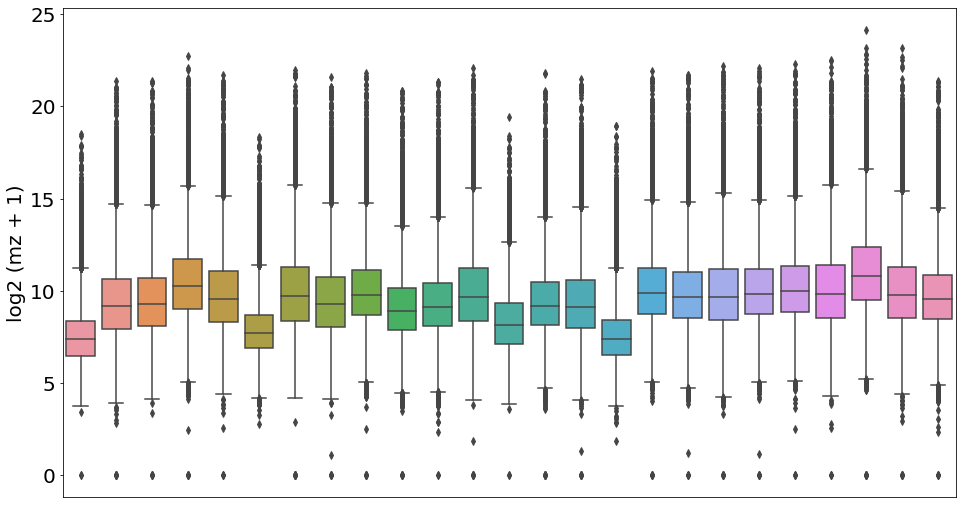

In [21]:
seaborn.boxplot(data=log2_intensities.iloc[:, :25])

matplotlib.pyplot.ylabel('log2 (mz + 1)')
matplotlib.pyplot.xticks([])

## 4.2. normalization

In [22]:
qn_log2_intensities = qnorm.quantile_normalize(log2_intensities)  

([], [])

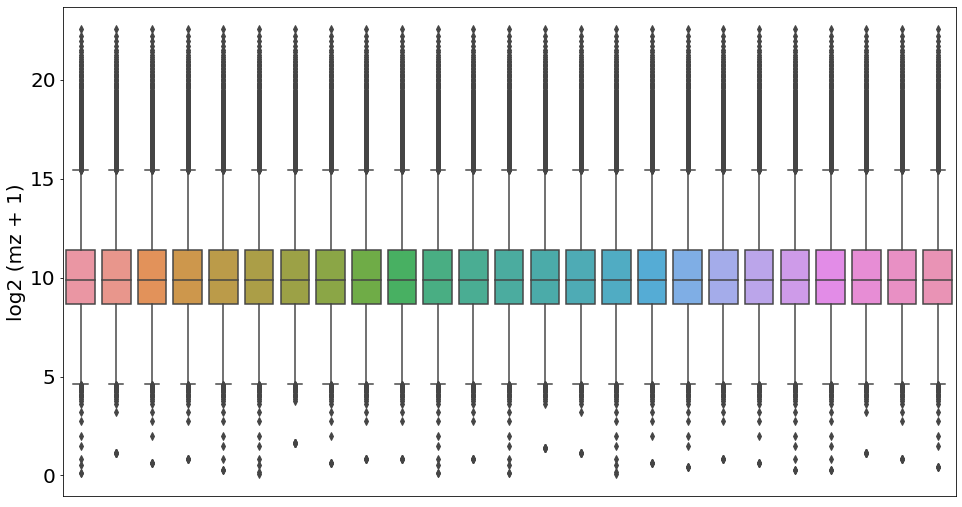

In [23]:
seaborn.boxplot(data=qn_log2_intensities.iloc[:, :25])

matplotlib.pyplot.ylabel('log2 (mz + 1)')
matplotlib.pyplot.xticks([])

# 5. slice variables and samples of interest

In [24]:
qn_log2_intensities.head()

,EC72_Lipidomics_000097,EC72_Lipidomics_000098,EC72_Lipidomics_000099,EC72_Lipidomics_000100,EC72_Lipidomics_000101,EC72_Lipidomics_000102,EC72_Lipidomics_000103,EC72_Lipidomics_000107,EC72_Lipidomics_000108,EC72_Lipidomics_000109,...,EC72_Lipidomics_000393,EC72_Lipidomics_000394,EC72_Lipidomics_000395,EC72_Lipidomics_000396,EC72_Lipidomics_000397,EC72_Lipidomics_000401,EC72_Lipidomics_000402,EC72_Lipidomics_000403,EC72_Lipidomics_000404,EC72_Lipidomics_000405
mz_rt,,,,,,,,,,,,,,,,,,,,,
283.1687299_527.485,12.682775,12.141848,12.765742,13.720087,12.345879,13.019045,11.559788,11.934919,12.640738,12.656854,...,10.538537,10.794391,12.272094,10.996889,13.452527,12.612442,12.758441,12.980802,13.800308,15.048023
284.1718093_527.263,9.495286,9.509511,10.234770,10.504678,10.010877,10.598672,9.470116,9.456156,10.149937,9.848176,...,8.594234,9.156509,9.257875,8.967583,10.751849,10.125095,9.310665,9.655085,11.173273,11.284065
291.2324828_528.324,9.489941,11.146152,10.209039,11.832419,10.607044,9.208597,10.495590,11.106519,10.792630,11.197162,...,7.406847,8.797260,9.706324,8.010330,13.356411,13.012910,9.761030,8.470285,12.553433,12.994199
292.2350434_528.433,9.278886,9.298452,8.349663,8.986461,8.462141,8.905499,8.664302,8.526643,8.197800,8.920917,...,6.497076,7.816133,7.839824,6.733231,10.582671,10.740918,7.608966,7.438300,9.985953,10.355990
339.2332701_528.43,11.593901,13.776974,14.705459,15.043206,13.831570,14.257279,13.209238,13.635489,14.805347,14.754533,...,12.994958,12.794513,13.252442,13.507353,15.694745,14.774334,13.483518,14.225489,16.021870,16.430934


In [25]:
subset_intensities = qn_log2_intensities.loc[pois, :]
print(subset_intensities.shape)
subset_intensities.head()

(18, 132)


,EC72_Lipidomics_000097,EC72_Lipidomics_000098,EC72_Lipidomics_000099,EC72_Lipidomics_000100,EC72_Lipidomics_000101,EC72_Lipidomics_000102,EC72_Lipidomics_000103,EC72_Lipidomics_000107,EC72_Lipidomics_000108,EC72_Lipidomics_000109,...,EC72_Lipidomics_000393,EC72_Lipidomics_000394,EC72_Lipidomics_000395,EC72_Lipidomics_000396,EC72_Lipidomics_000397,EC72_Lipidomics_000401,EC72_Lipidomics_000402,EC72_Lipidomics_000403,EC72_Lipidomics_000404,EC72_Lipidomics_000405
mz_rt,,,,,,,,,,,,,,,,,,,,,
339.232461_578.387,11.712487,14.146811,14.875274,15.740691,14.414455,13.760422,13.878812,14.218320,14.902475,14.455314,...,13.086665,12.378130,13.445927,14.670000,14.750813,14.622498,12.967210,14.416208,14.554351,16.651706
369.3505022_623.345,13.888664,11.519181,11.462590,10.946493,11.295551,13.752637,11.187134,11.499576,11.406695,11.915980,...,9.271403,8.766953,8.541632,10.063821,9.720548,10.014518,8.651238,9.696224,9.417130,9.263864
369.3513864_571.079,15.240106,11.254906,11.648014,12.529975,11.202168,15.895952,10.855873,11.328426,11.077773,12.023663,...,8.969100,9.258688,9.722612,9.558391,9.858813,10.297048,8.795931,10.472563,9.769604,10.395528
369.3518543_582.8935,17.044083,11.904489,13.044508,12.611214,11.430581,17.478032,11.922230,11.620272,11.600501,12.469909,...,8.964965,8.266103,9.231787,11.248521,11.132862,10.849767,8.998548,8.745033,9.040344,10.318978
369.3528698_377.675,17.276466,13.319001,12.820791,12.218773,12.721061,17.257834,12.179249,12.909723,12.147340,12.737189,...,12.513836,11.293512,11.308865,13.553975,12.847547,12.106856,11.209755,11.972463,12.518943,12.780867


# 6. plot metabolites across conditions

In [26]:
experiments = [1, 2]
timepoints = [0, 4, 24]
treatments = ['0 µM', '5 µM epi', '5 µM nor', '5 µM epi:nor', 'TNFa']

In [27]:
# check I'm not missing any condition
a = sample_list['Treatment'].to_list()
for element in a:
    if element not in treatments:
        print(element)
        print('ERROR')

In [28]:
condition_order = [
    ('0 µM', 0),
    ('0 µM', 4),
    ('0 µM', 24),
    
    ('5 µM epi:nor', 4),
    ('5 µM epi', 4),
    ('5 µM nor', 4),
    ('TNFa', 4),

    ('5 µM epi:nor', 24),
    ('5 µM epi', 24),
    ('5 µM nor', 24),
    ('TNFa', 24),
]

In [29]:
my_pal = {
    0:"white", 1:"white", 2:'white',
    3:"tab:red", 4:"tab:orange", 5:"violet", 6:'tab:green',
    7:"tab:red", 8:"tab:orange", 9:"violet", 10:'tab:green'
         }

In [30]:
legend_elements = [
    matplotlib.patches.Patch(facecolor='white', edgecolor='gray'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='gray'),
    matplotlib.patches.Patch(facecolor='tab:orange', edgecolor='gray'),
    matplotlib.patches.Patch(facecolor='violet', edgecolor='gray'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='gray')
]

Variable 339.232461_578.387
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


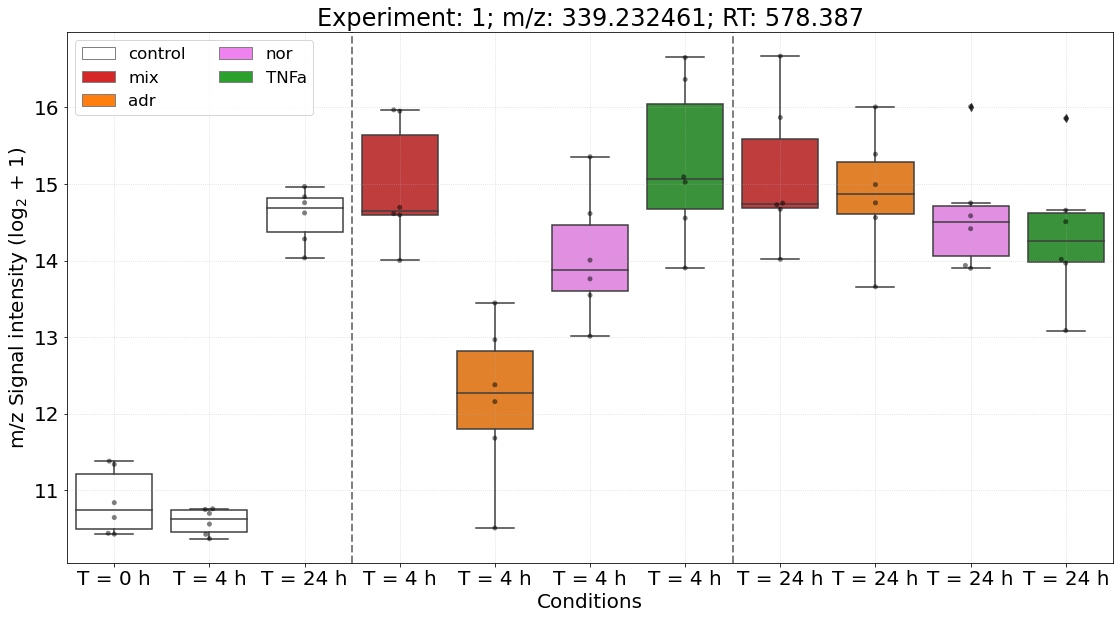

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


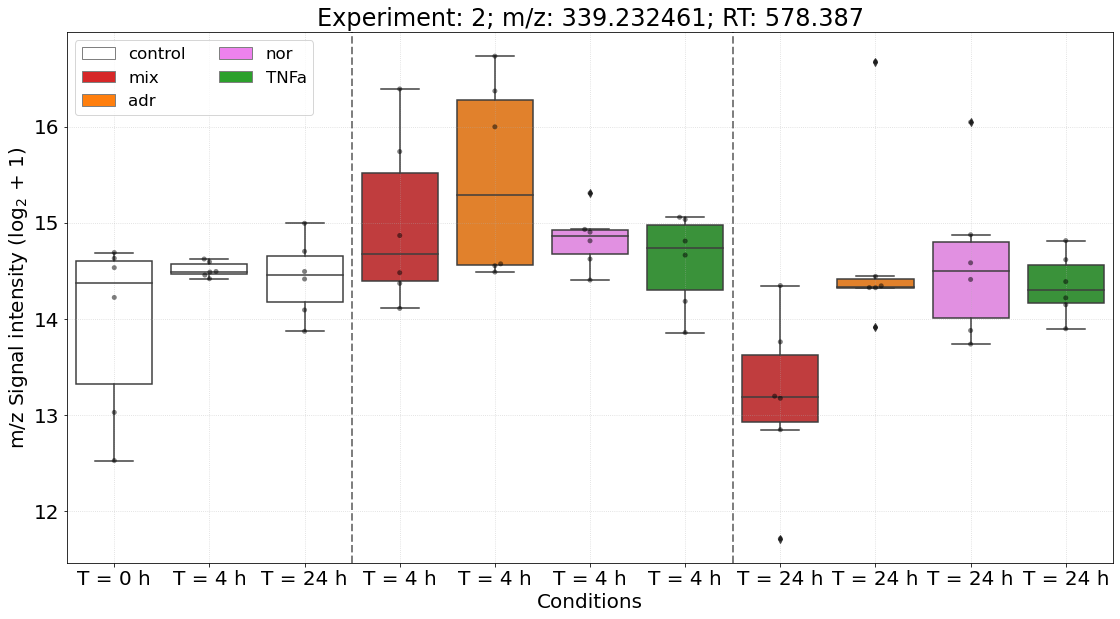

Variable 369.3505022_623.345
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


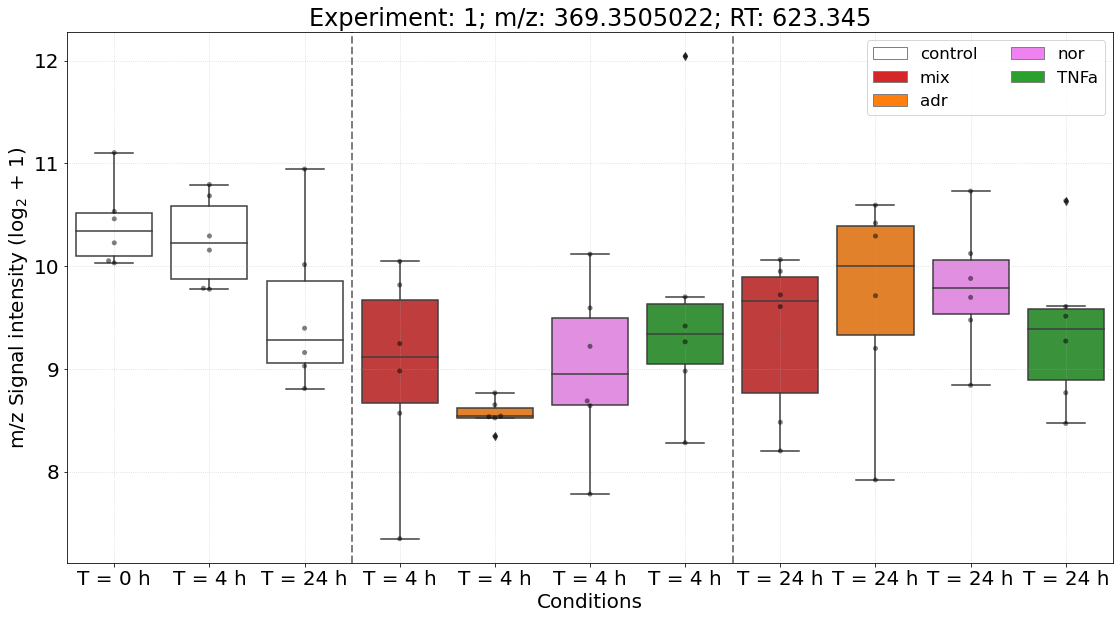

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


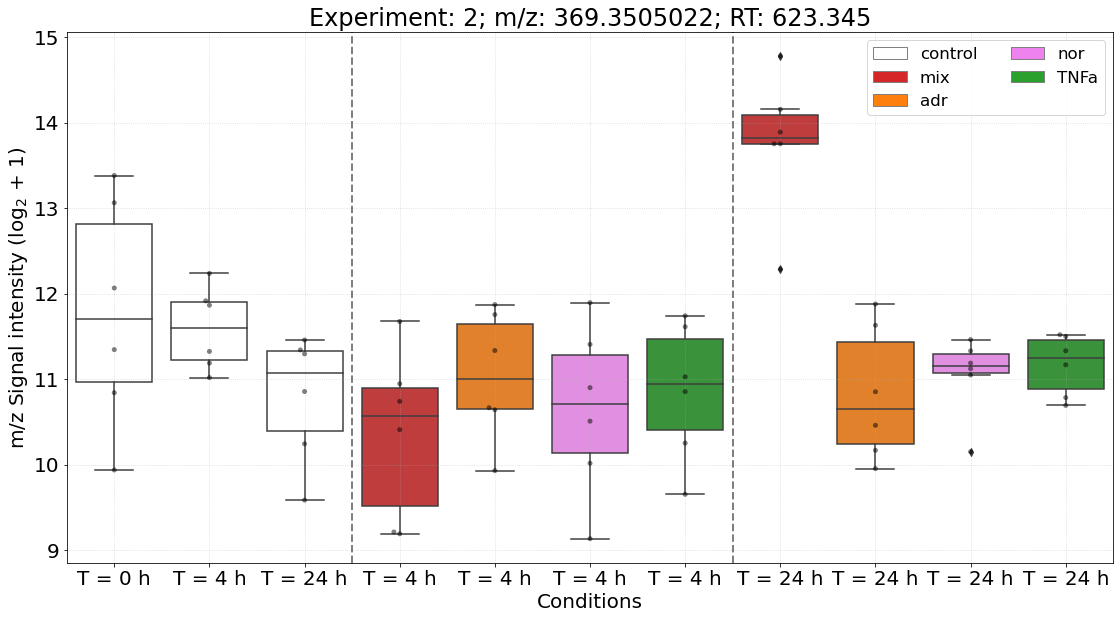

Variable 369.3513864_571.079
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


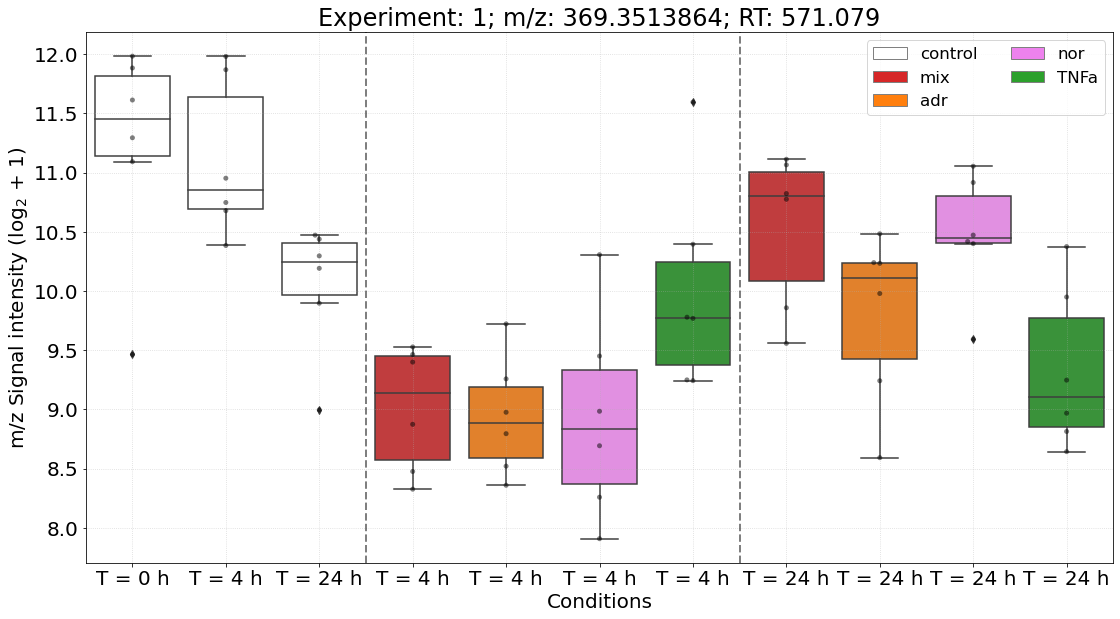

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


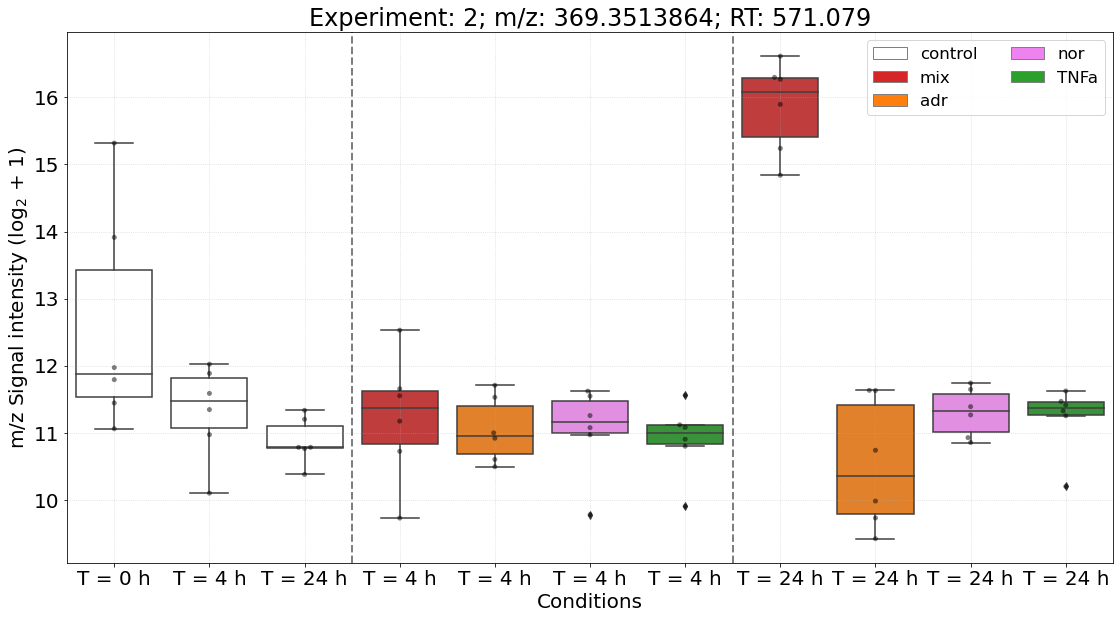

Variable 369.3518543_582.8935
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


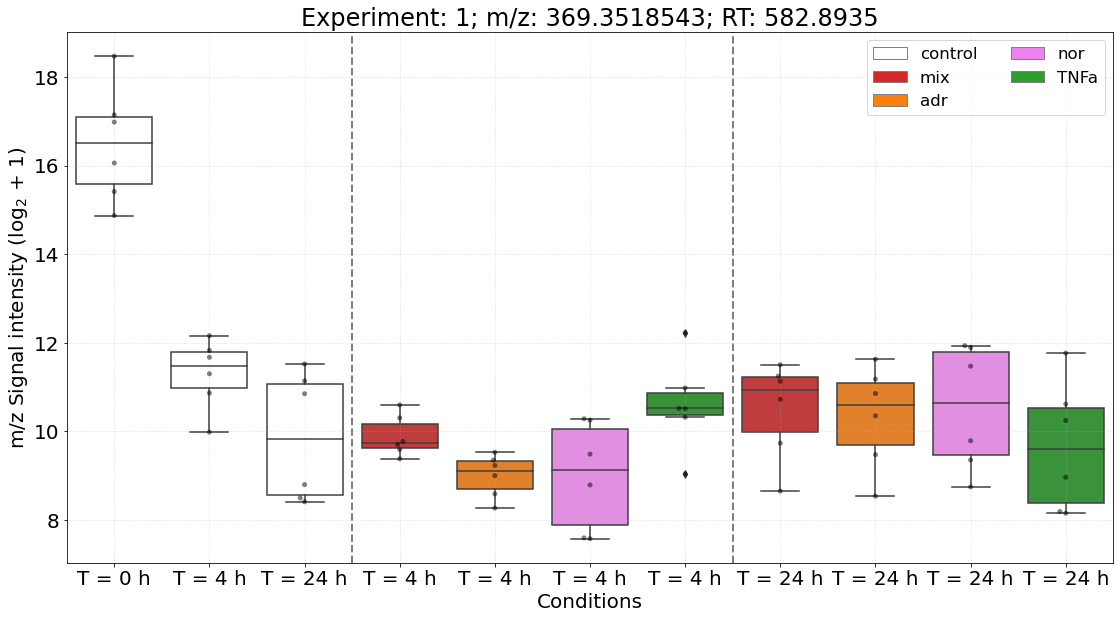

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


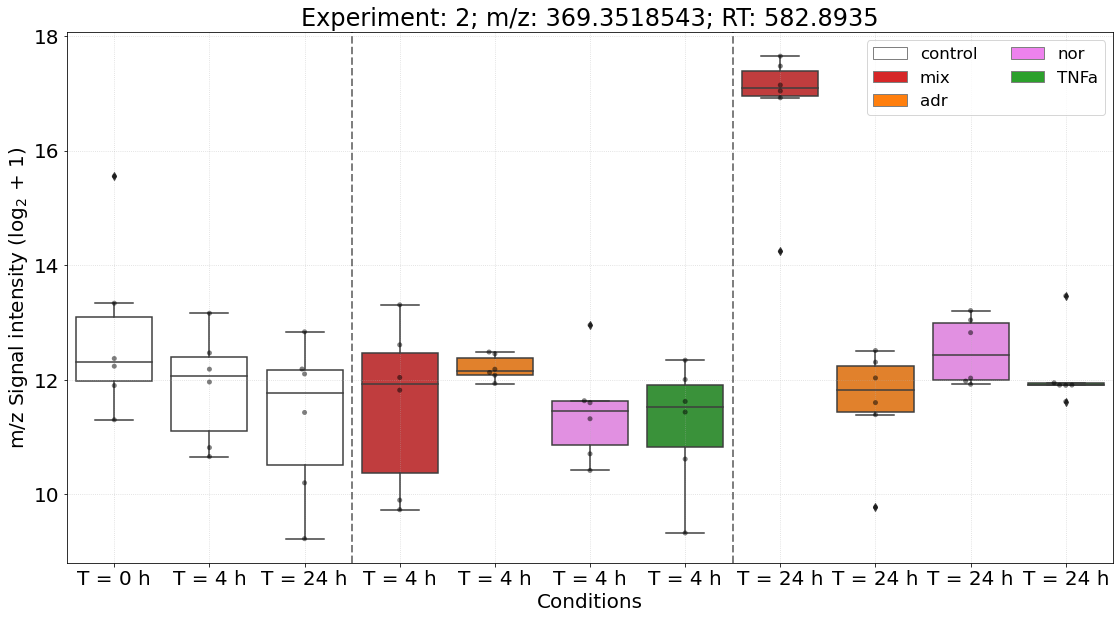

Variable 369.3528698_377.675
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


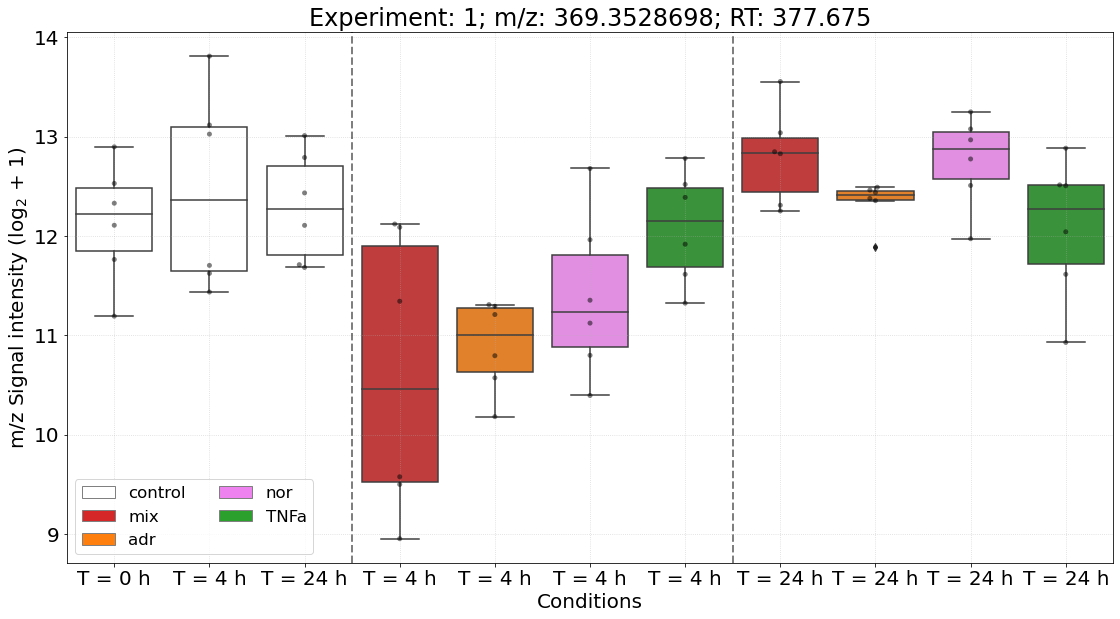

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


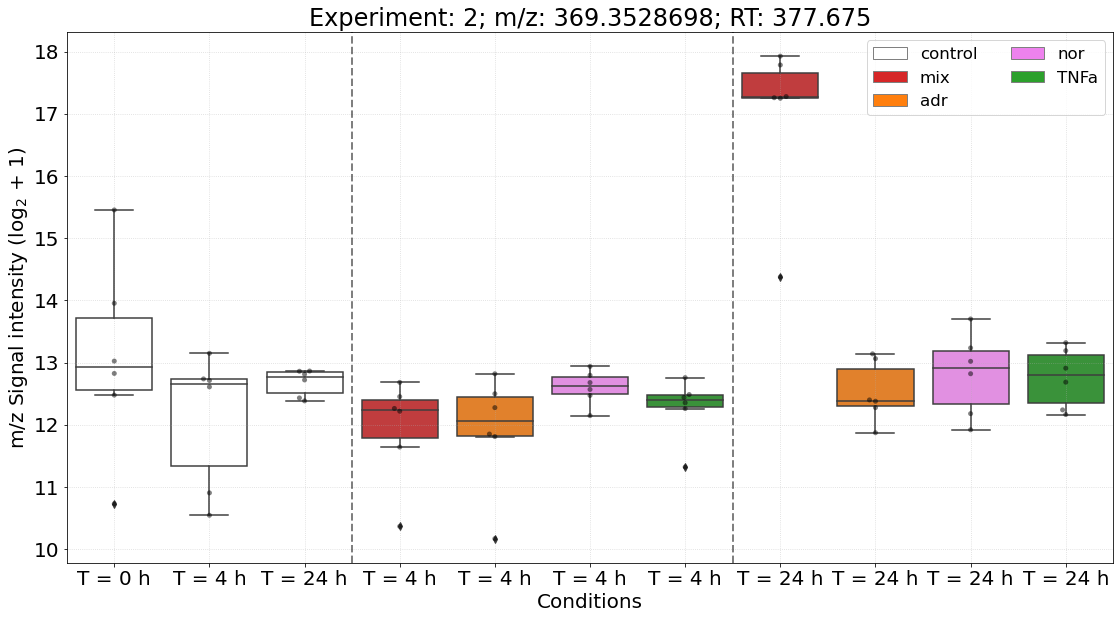

Variable 383.3662555_568.8195
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


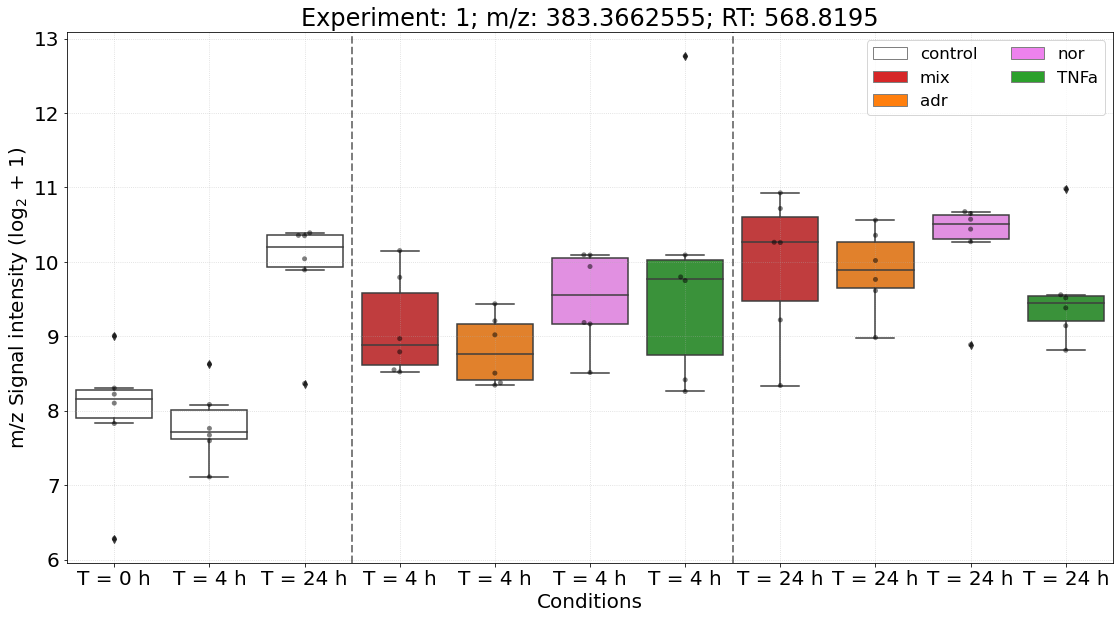

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


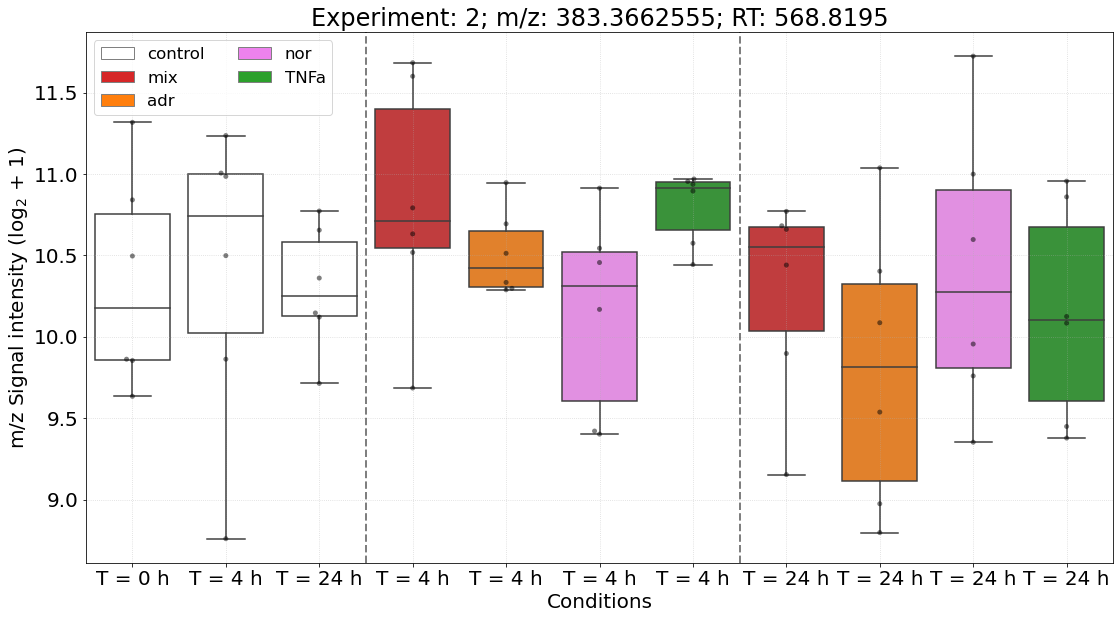

Variable 395.3685075_571.883
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


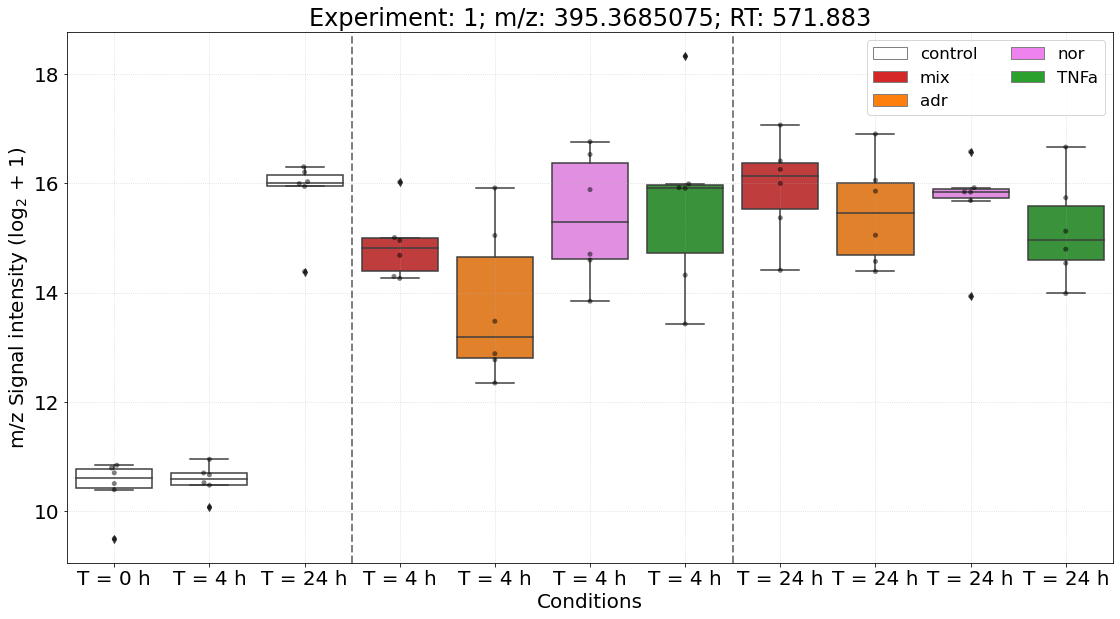

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


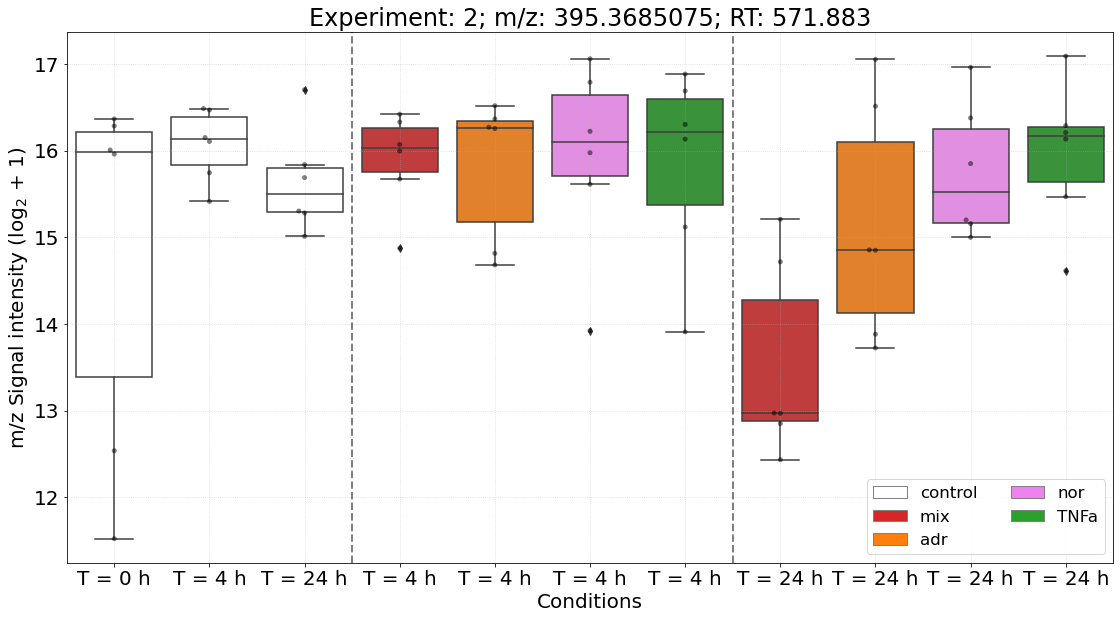

Variable 397.3829618_572.15
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


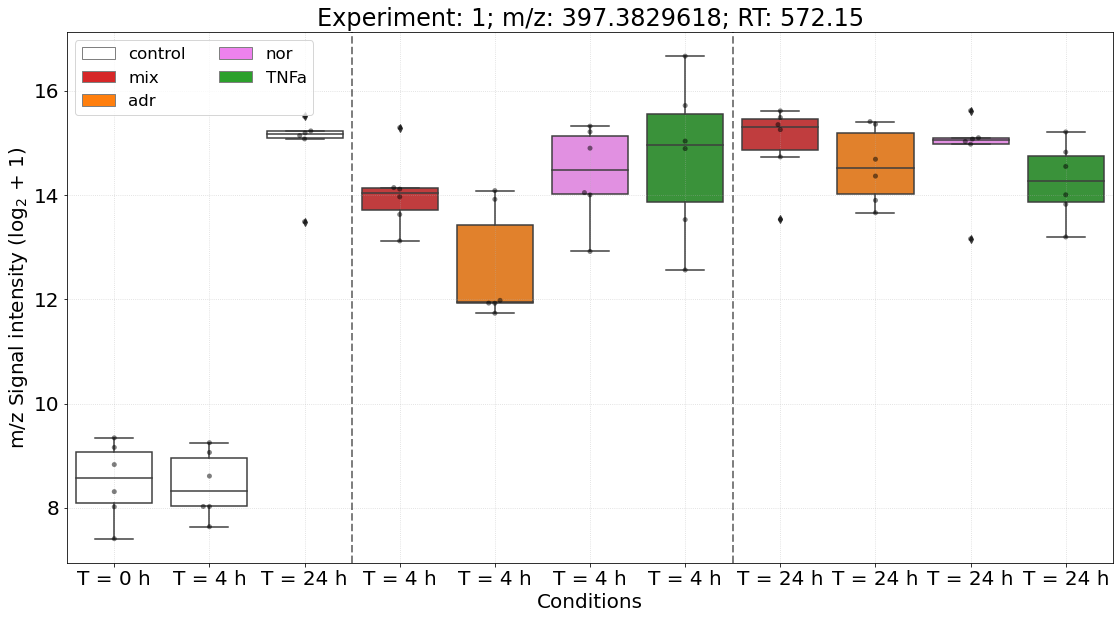

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


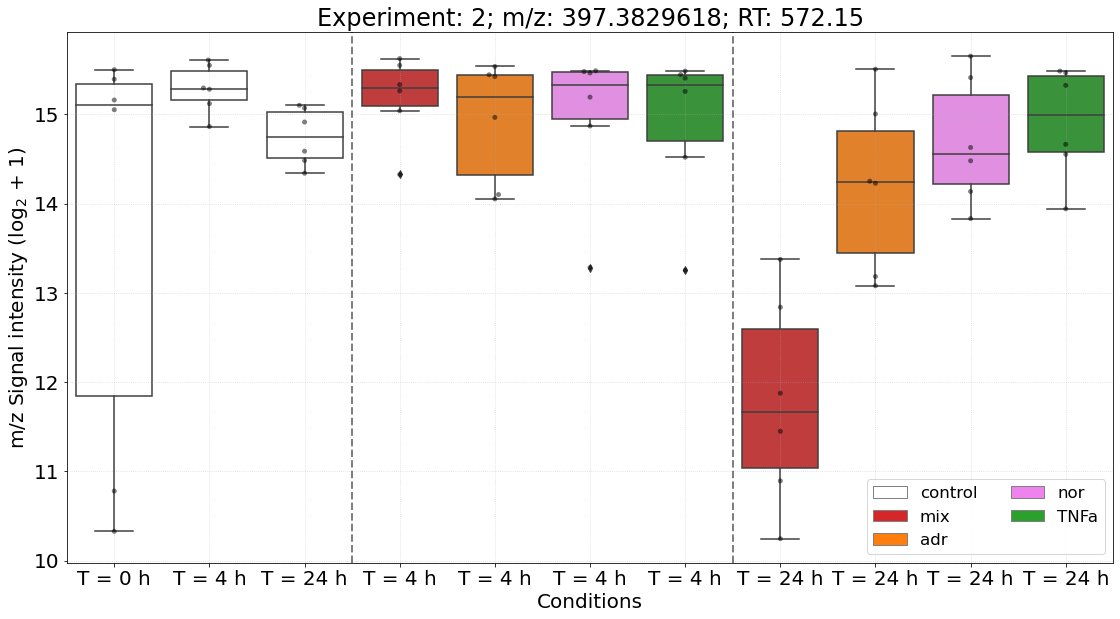

Variable 397.3838654_503.943
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


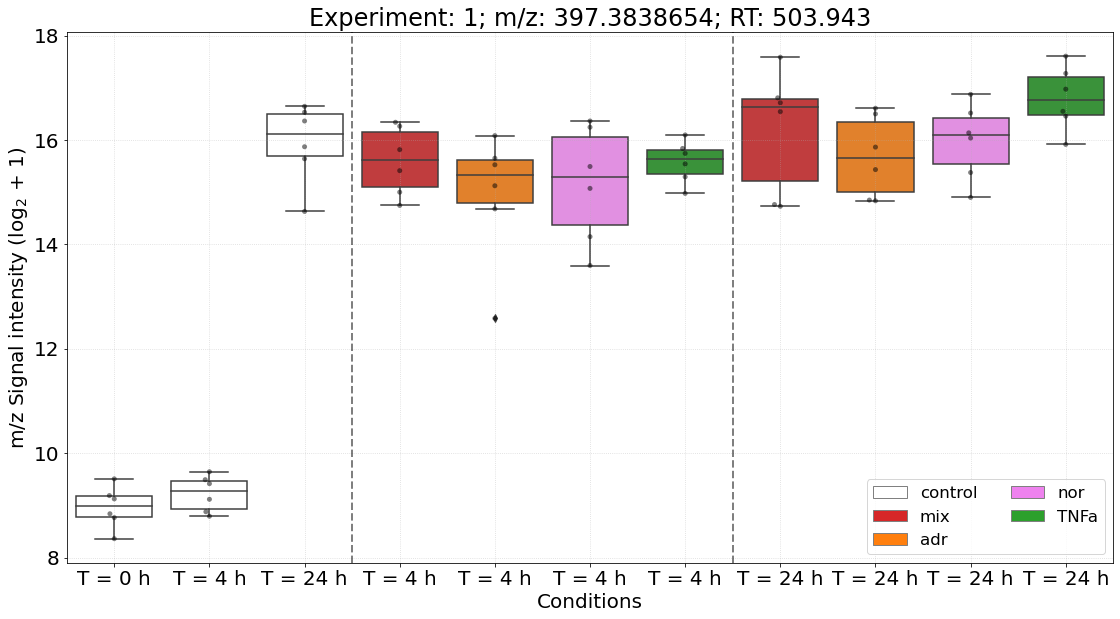

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


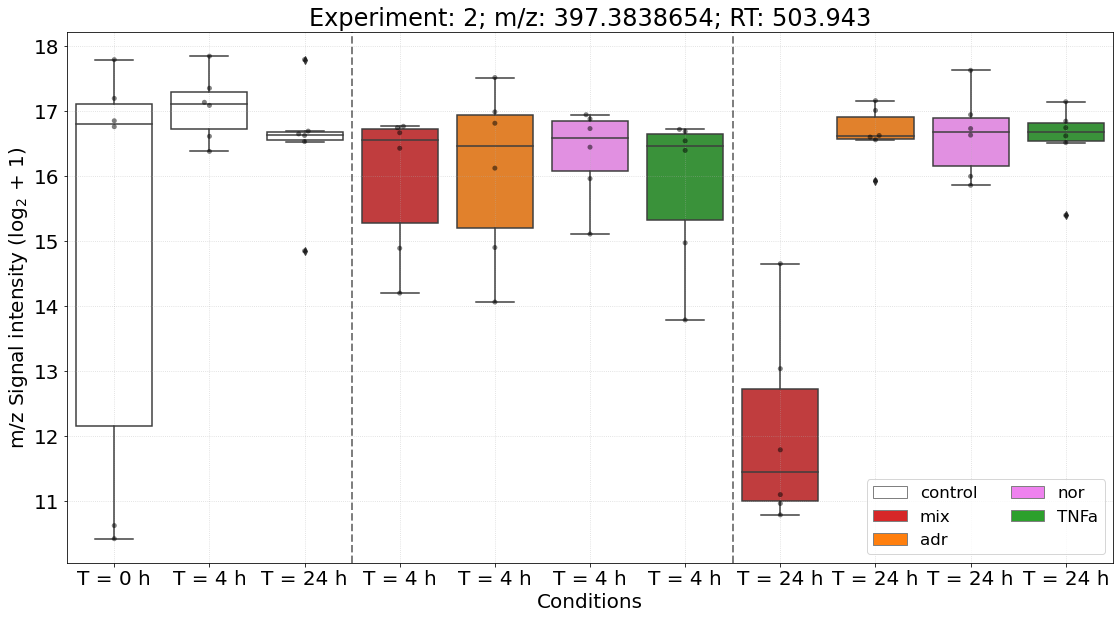

Variable 397.3840357_580.713
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


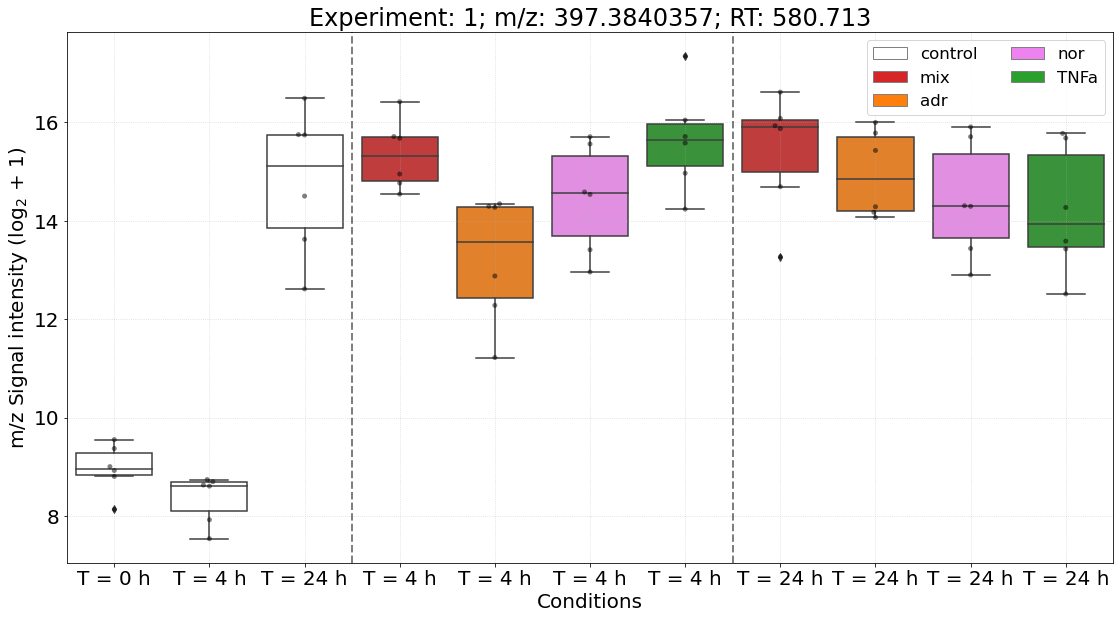

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


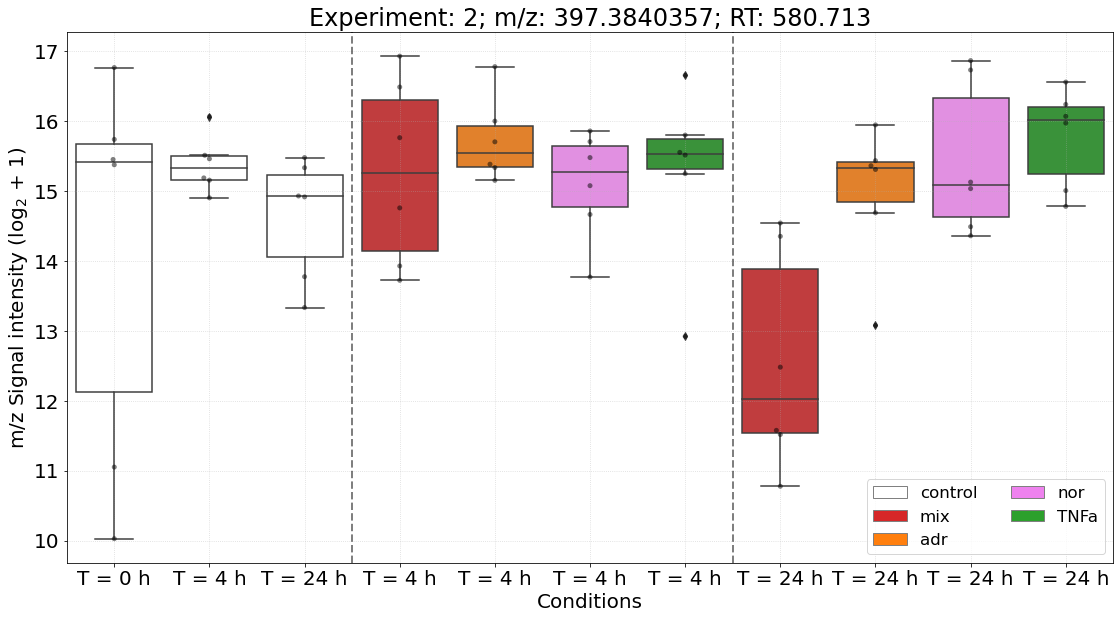

Variable 409.3850378_586.173
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


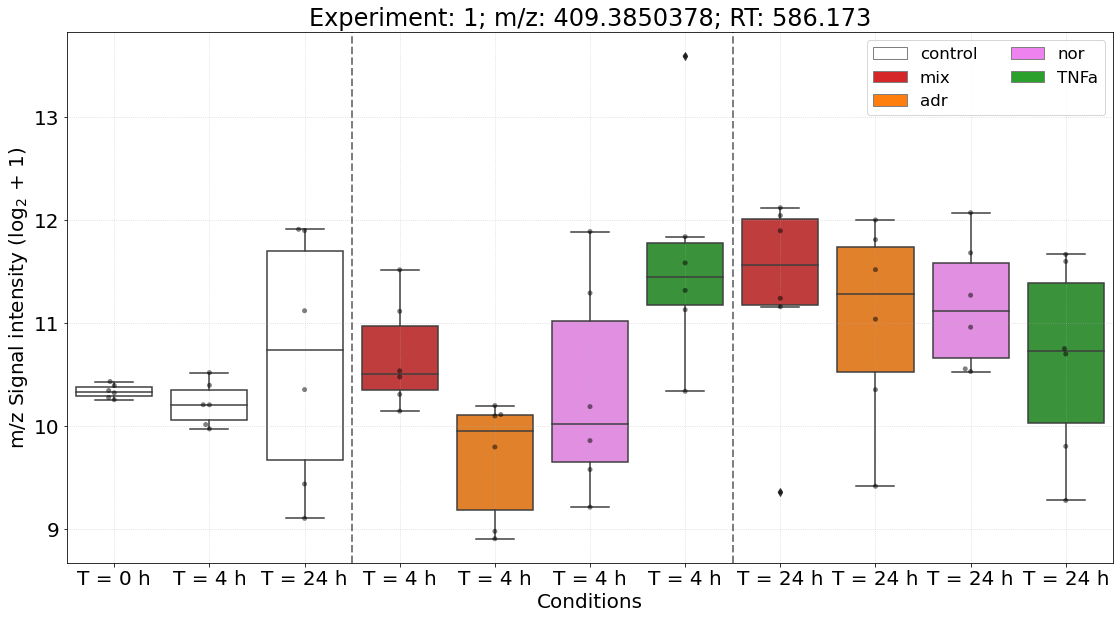

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


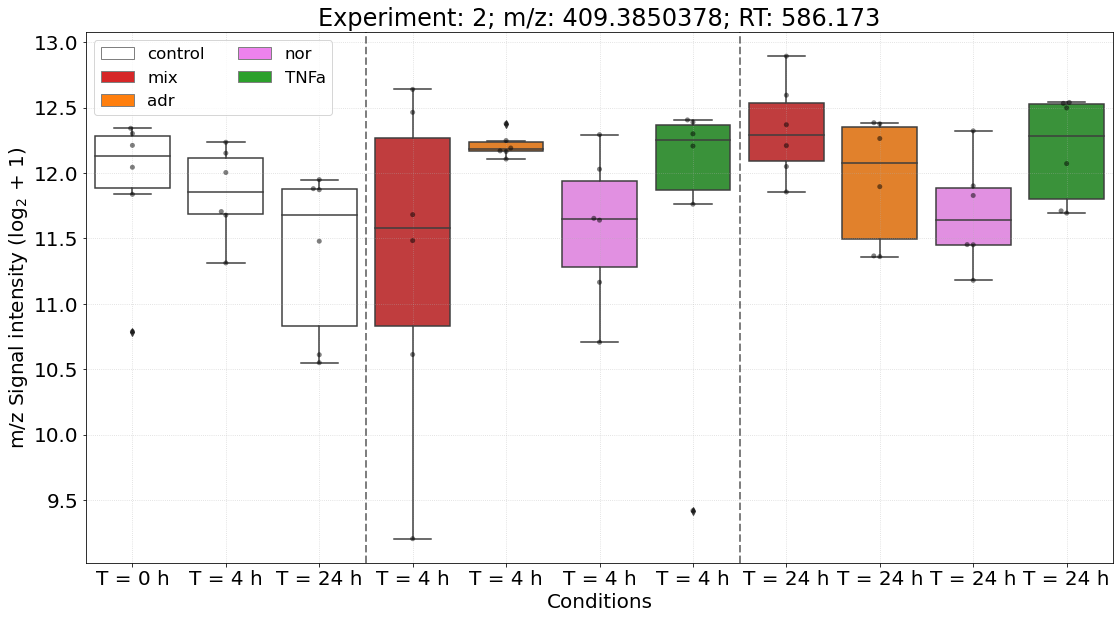

Variable 423.3267104_586.705
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


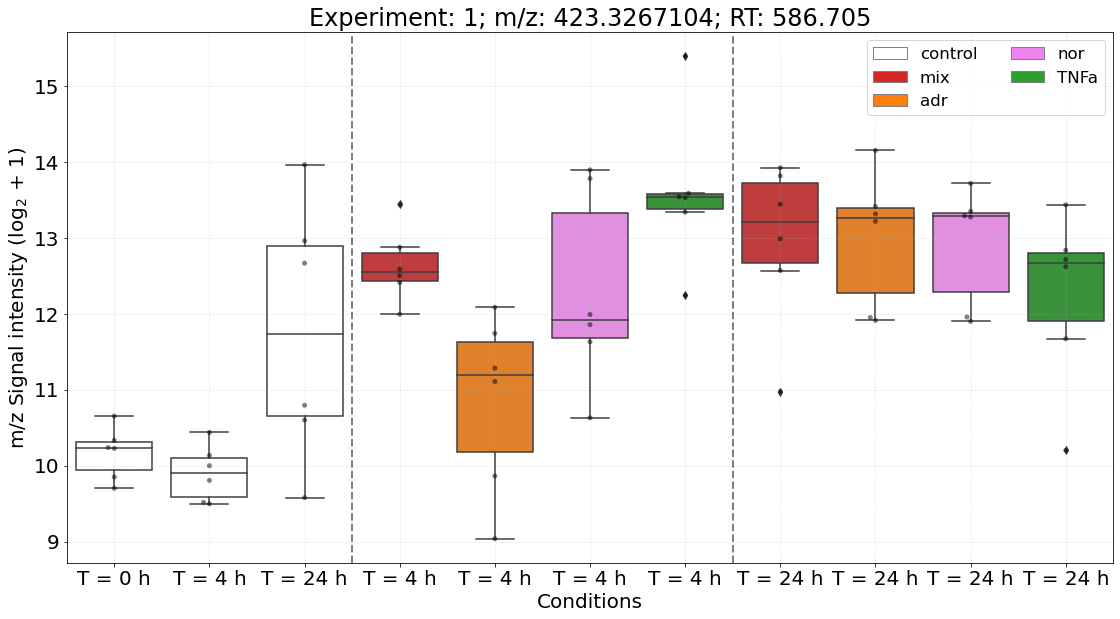

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


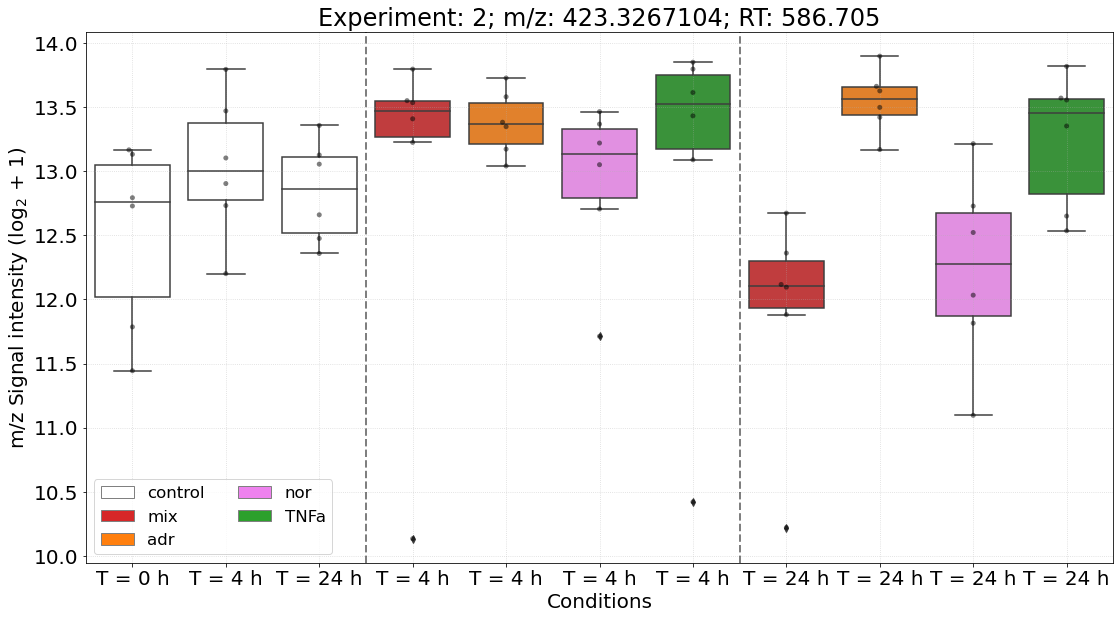

Variable 423.3998618_576.486
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


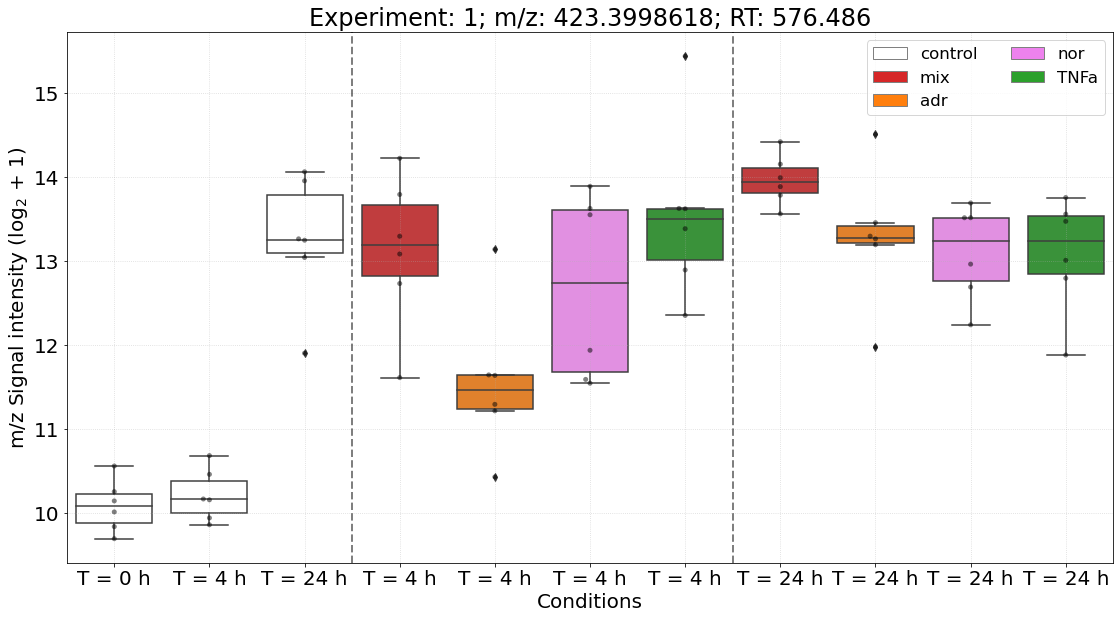

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


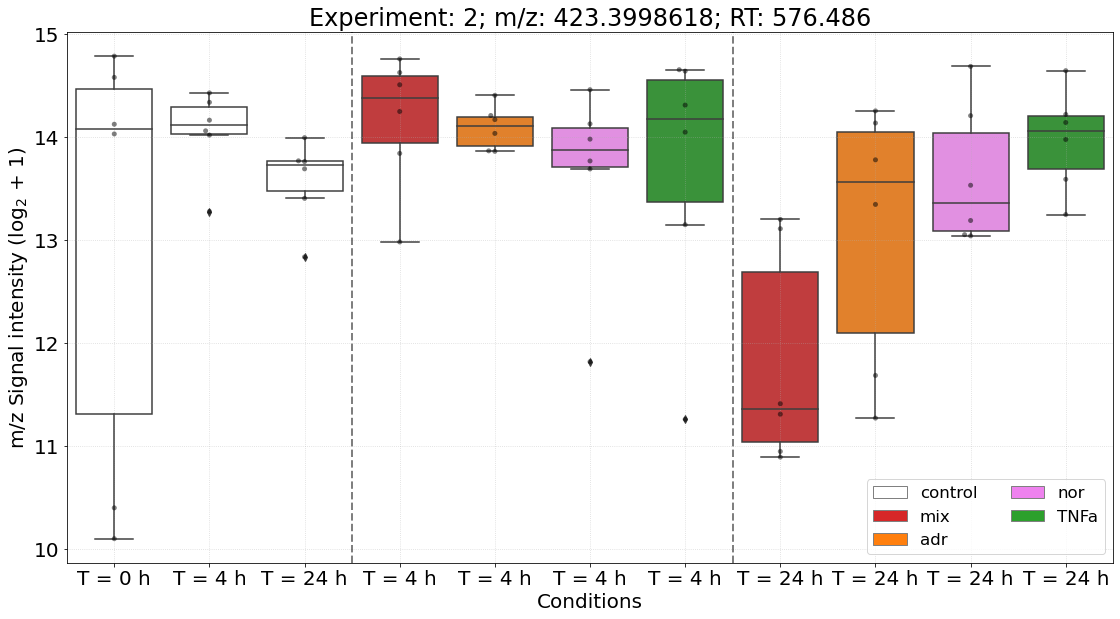

Variable 551.5047167_573.444
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


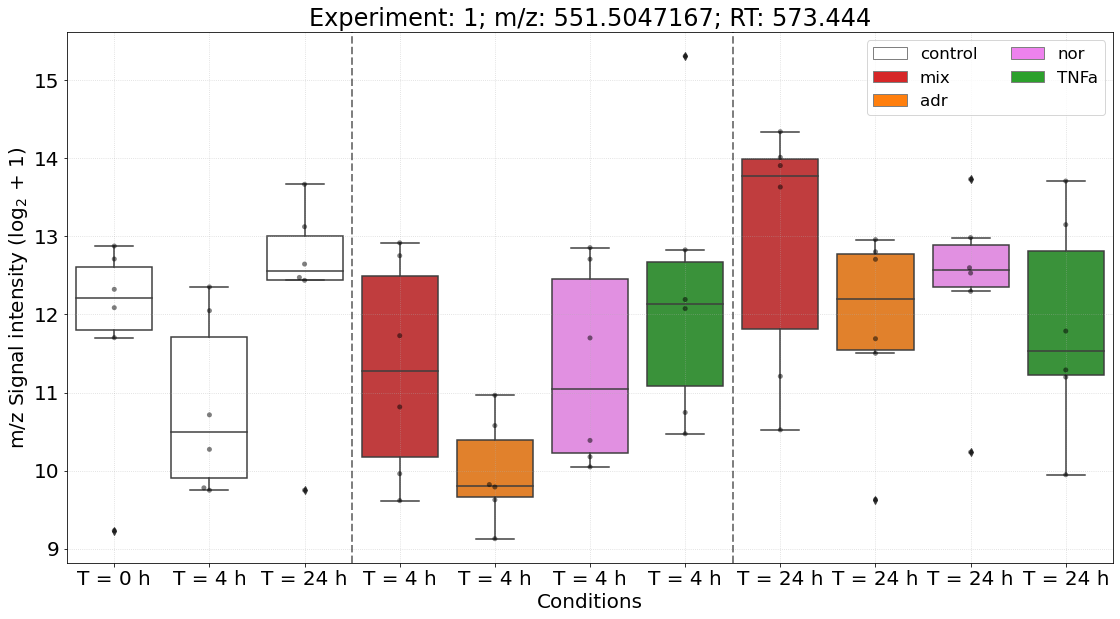

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


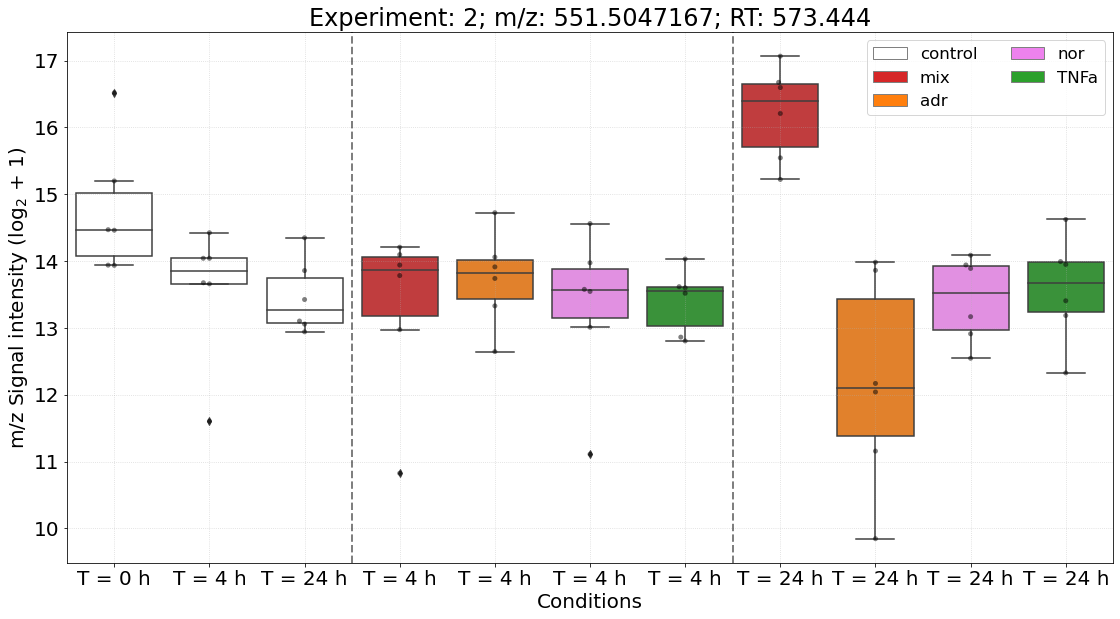

Variable 579.5357885_583.9385
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


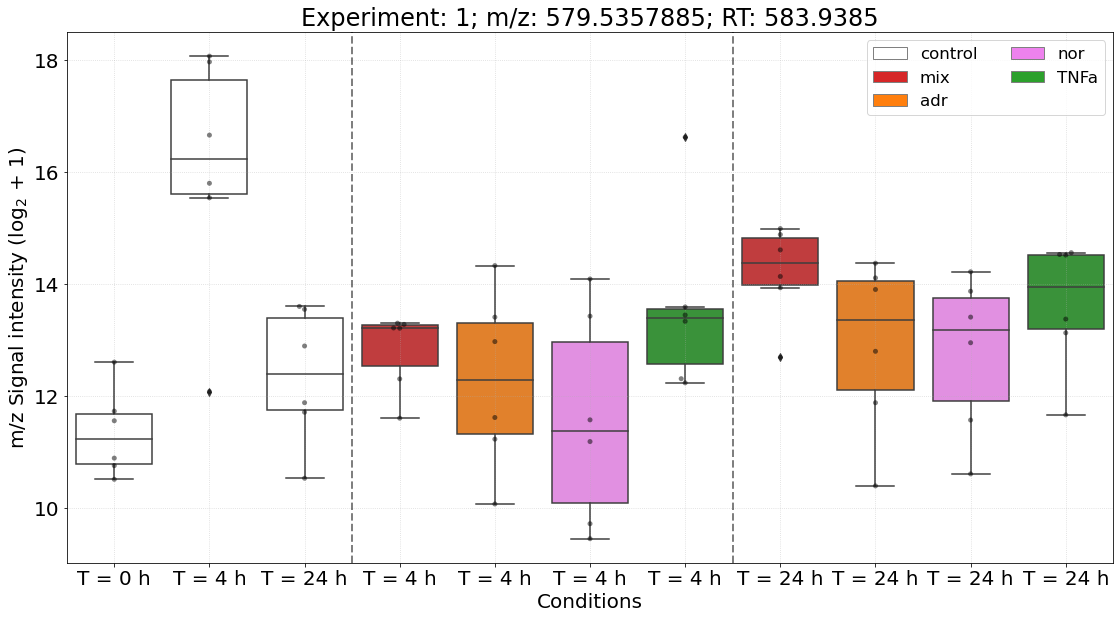

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


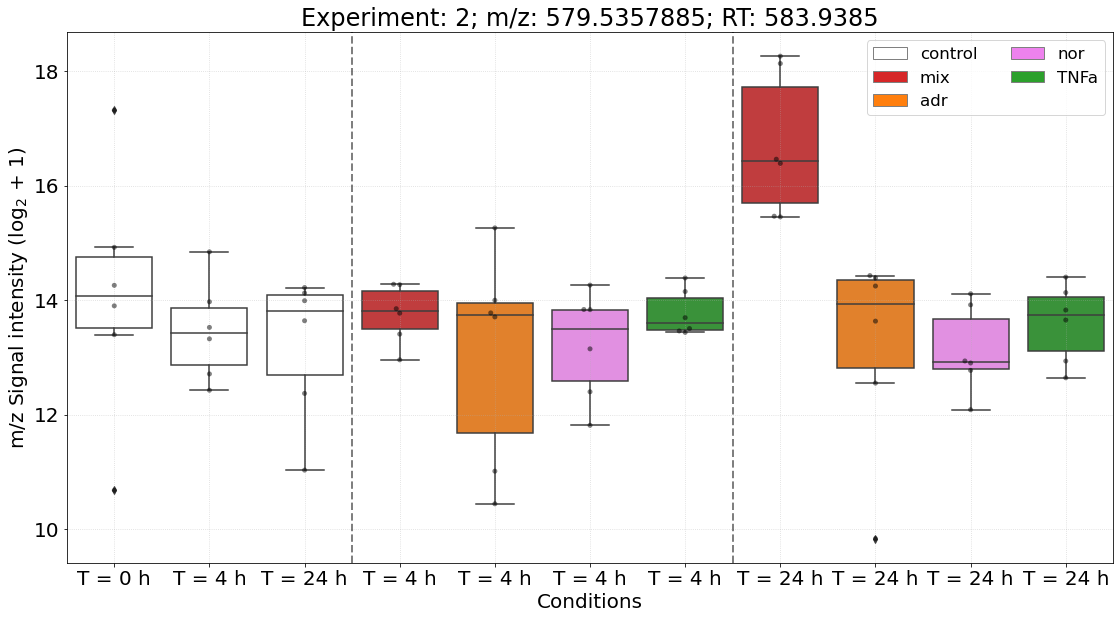

Variable 663.4560262_577.192
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


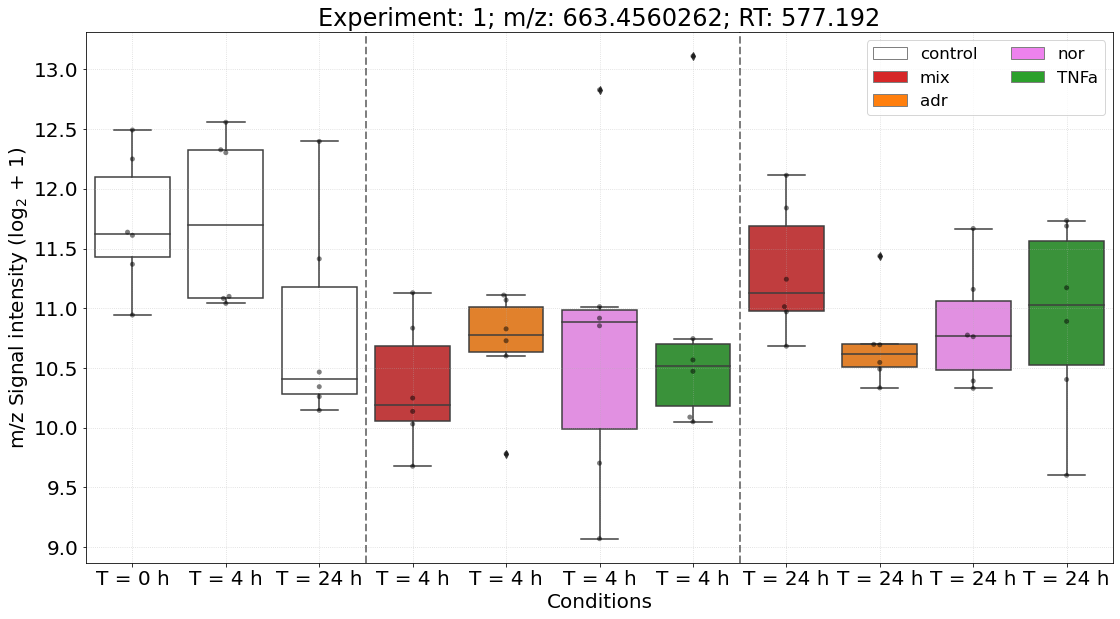

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


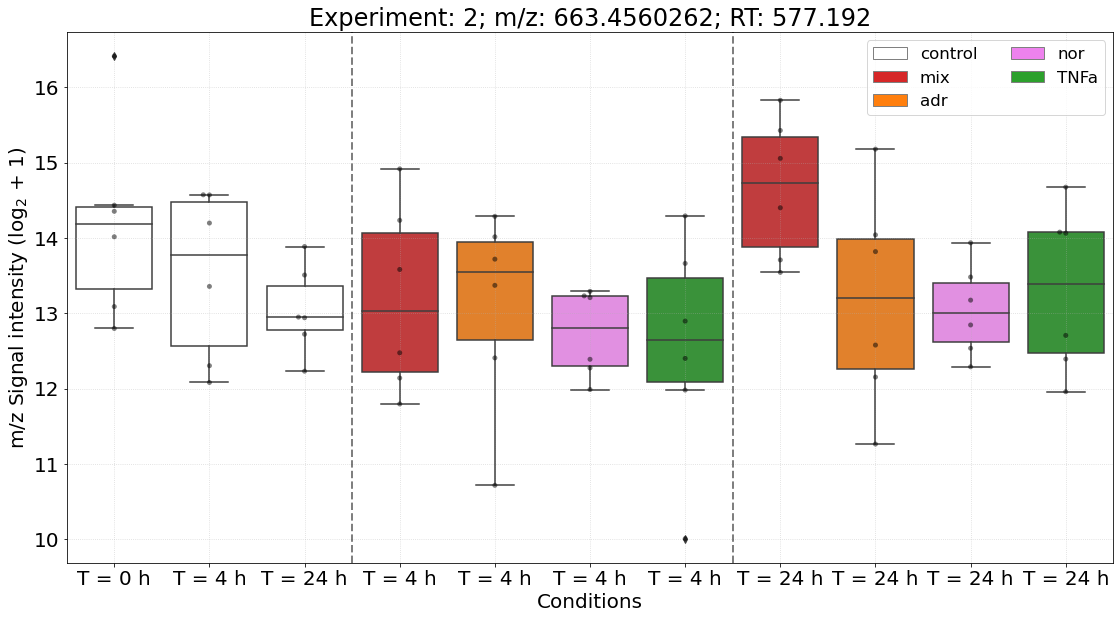

Variable 692.634682_571.834
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


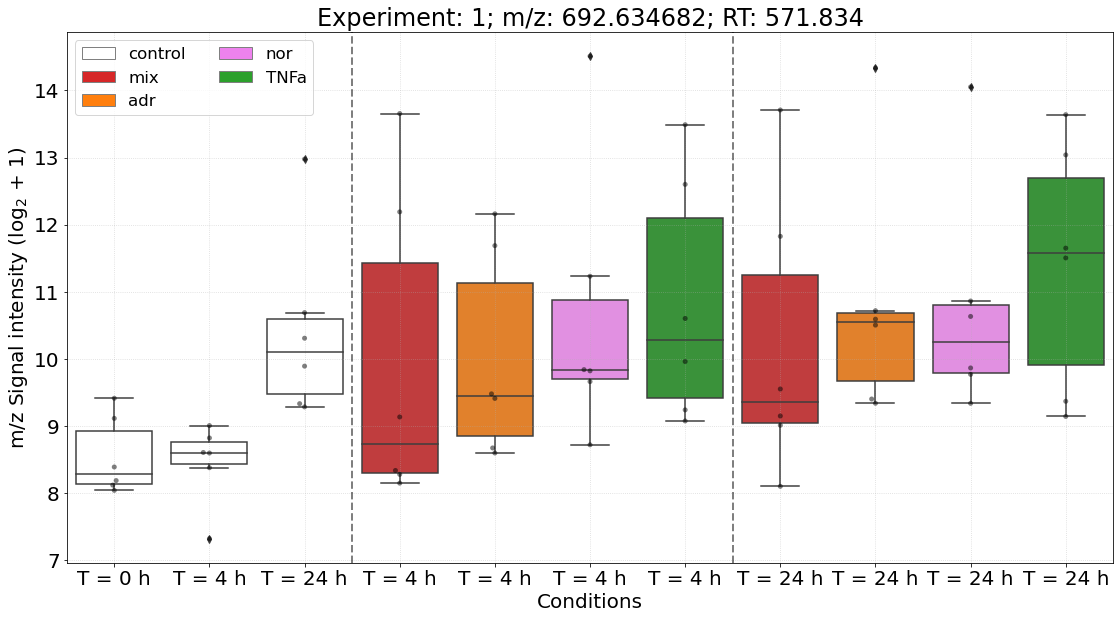

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


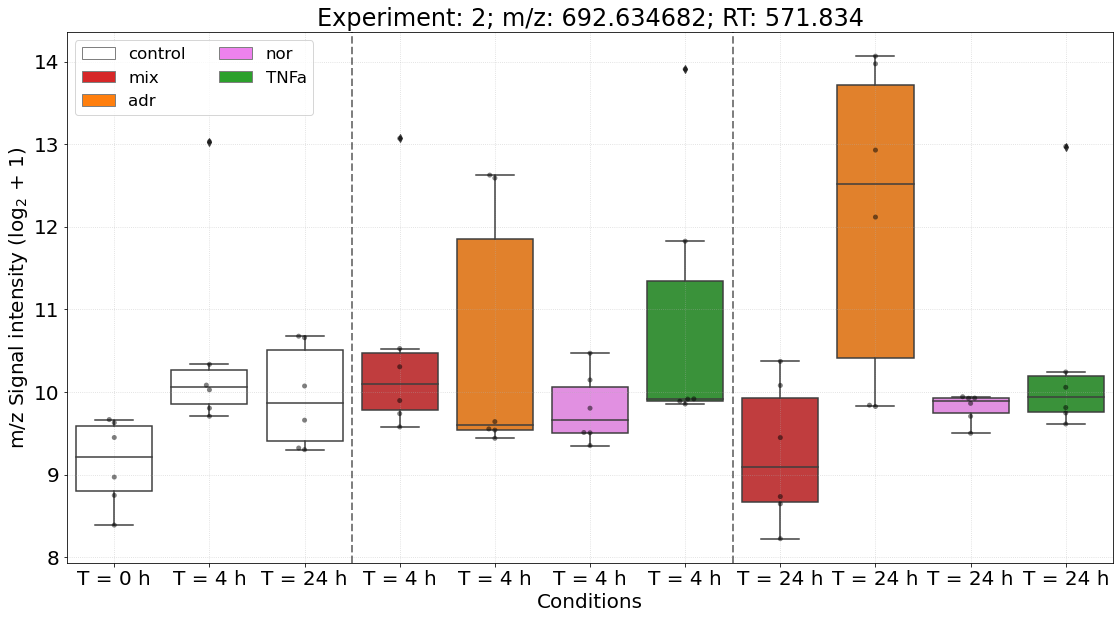

Variable 852.802618_583.295
	 Working with Experiment 1, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 1, Timepoint 24, Treatment TNFa. Size: (6, 14)


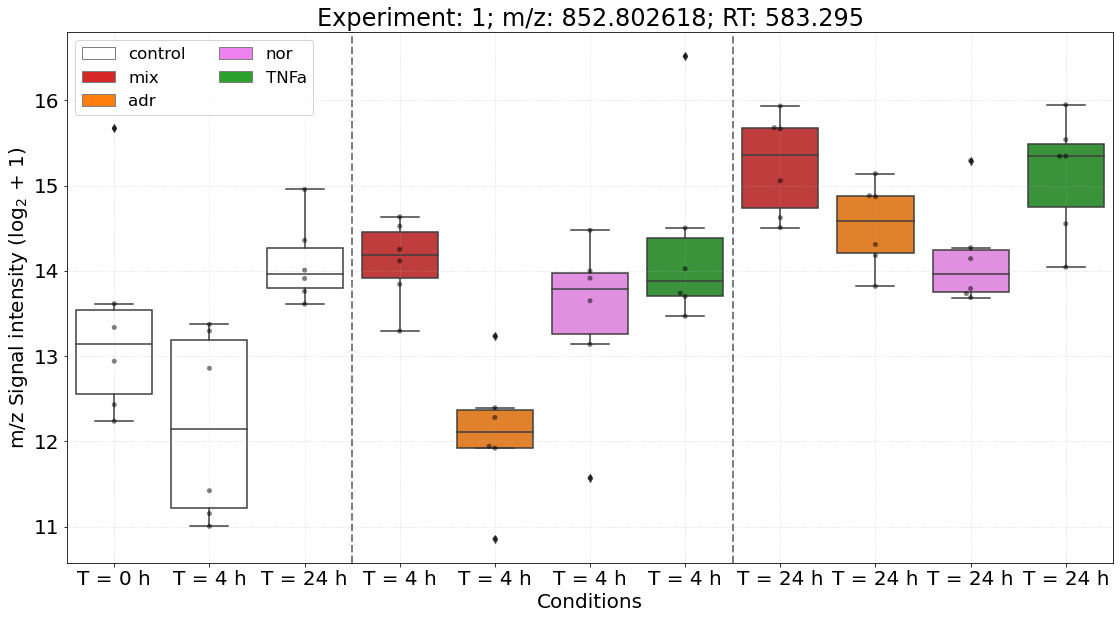

	 Working with Experiment 2, Timepoint 0, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 0 µM. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 4, Treatment TNFa. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi:nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM epi. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment 5 µM nor. Size: (6, 14)
	 Working with Experiment 2, Timepoint 24, Treatment TNFa. Size: (6, 14)


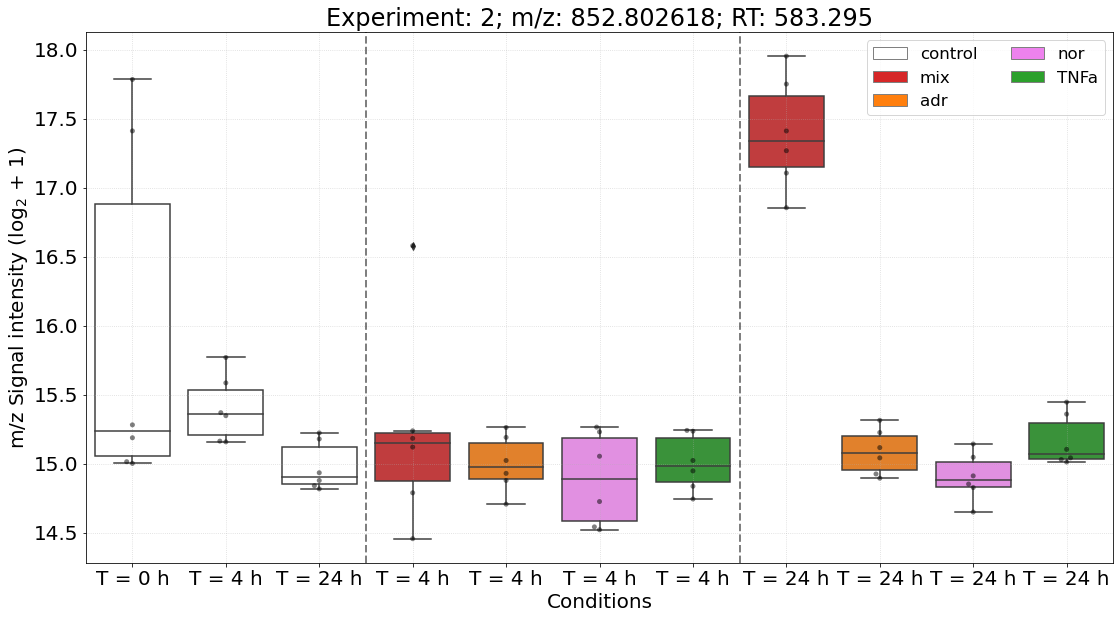

In [31]:
for variable in subset_intensities.index:
    print('Variable {}'.format(variable))
    for experiment in experiments:
        boxplot_data = []
        for condition in condition_order:
            rules = (sample_list['Experiment'] == experiment) & (sample_list['Timepoint'] == condition[1]) & (sample_list['Treatment'] == condition[0])
            sub_sample_list = sample_list[rules]
            if sub_sample_list.shape[0] > 1:
                print('\t Working with Experiment {}, Timepoint {}, Treatment {}. Size: {}'.format(experiment, condition[1], condition[0], sub_sample_list.shape))
                local_conditions = sub_sample_list.index.to_list()
                values = subset_intensities.loc[variable, local_conditions].to_list()
                boxplot_data.append(values)
                #boxplot_data.append([2**value for value in values])
                    
        # plot across conditions
        seaborn.boxplot(data=boxplot_data, palette=my_pal)
        seaborn.swarmplot(data=boxplot_data, color='black', alpha=1/2)
        
        matplotlib.pyplot.legend(legend_elements, ['control', 'mix', 'adr', 'nor', 'TNFa'], ncol=2, fontsize='small')
        matplotlib.pyplot.grid(alpha=0.5, ls=':')
        matplotlib.pyplot.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['T = 0 h', 'T = 4 h', 'T = 24 h', 'T = 4 h', 'T = 4 h', 'T = 4 h', 'T = 4 h', 'T = 24 h', 'T = 24 h', 'T = 24 h', 'T = 24 h'])
        matplotlib.pyplot.xlabel('Conditions')
        matplotlib.pyplot.ylabel('m/z Signal intensity (log$_2$ + 1)')
        title = 'Experiment: {}; m/z: {}; RT: {}'.format(experiment, variable.split('_')[0], variable.split('_')[1])
        matplotlib.pyplot.title(title)
        matplotlib.pyplot.axvline(x=2.5, color='black', ls='--', lw=2, alpha=1/2)
        matplotlib.pyplot.axvline(x=6.5, color='black', ls='--', lw=2, alpha=1/2)
        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()